In [ ]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Turn off matplotlib plot in Notebook

import numpy as np
from pathlib import Path

#plt.ioff()
plt.rcParams["animation.ffmpeg_path"] = "/usr/bin/ffmpeg"

In [2]:
%matplotlib inline

In [5]:
files = Path("debug_data")
#files = Path("debug_data")

In [6]:
debug_data = {"water": [], "dissolved": [], "velocity": [], "ground": []}
for f in files.iterdir():
    #print(f.name)
    names = f.name.split("_")
    file_type = names[0]
    file_timestep = names[1].split(".")[0]
    data = np.load(f)
    append_data = {"time": int(file_timestep), "data": data["0"]}
    debug_data[file_type].append(append_data)


In [7]:
for k in debug_data:
    debug_data[k].sort(key=lambda d: d["time"])

In [8]:
print(debug_data["water"][0]["data"].shape)
test = np.vstack([debug_data["water"][0]["data"], debug_data["water"][1]["data"]])

print(test.shape)

(10, 300, 100, 1)
(20, 300, 100, 1)


(300, 100, 1)


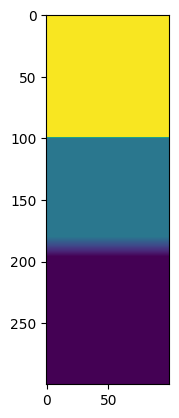

In [9]:
take = test[0, :, :, :]
print(take.shape)
plt.imshow(take)
plt.show()

In [10]:
stacked_data = {}
for key in debug_data:
    l = []
    for data in debug_data[key]:
        l.append(data["data"])
    print(len(l))
    stack = np.vstack(l)
    stacked_data[key] = stack

6
6
6
6


In [11]:
for key in stacked_data:
    print(stacked_data[key].shape)

(60, 300, 100, 1)
(60, 300, 100, 1)
(60, 300, 100, 2)
(60, 300, 100, 1)


water
dissolved
velocity
ground
(60, 300, 100, 2)


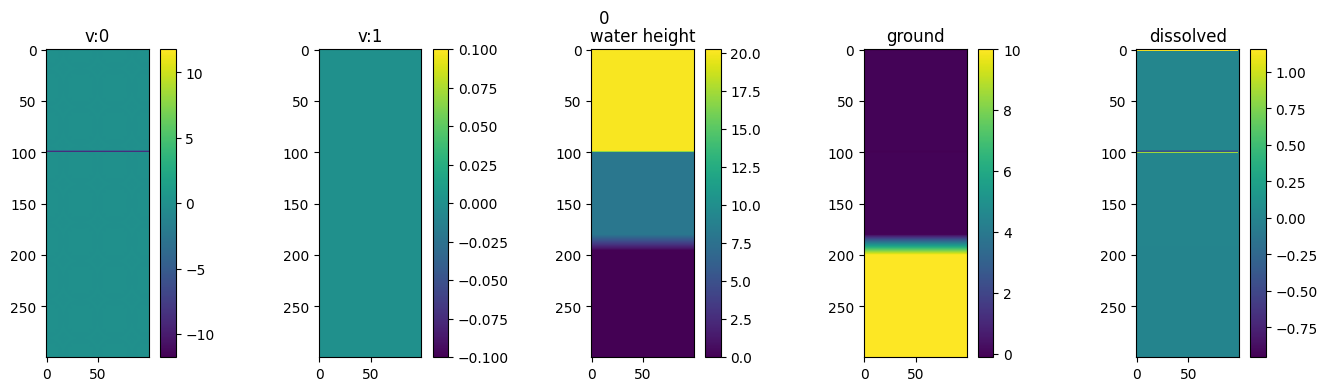

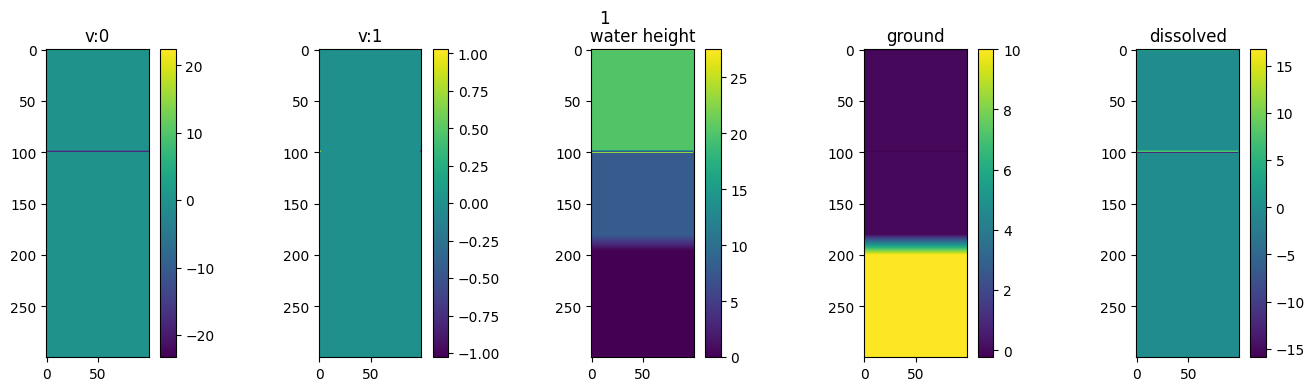

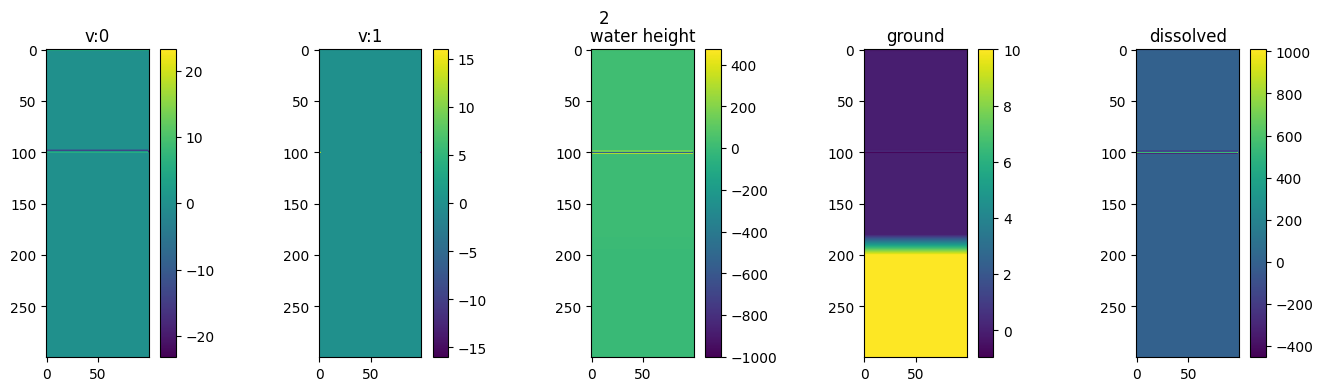

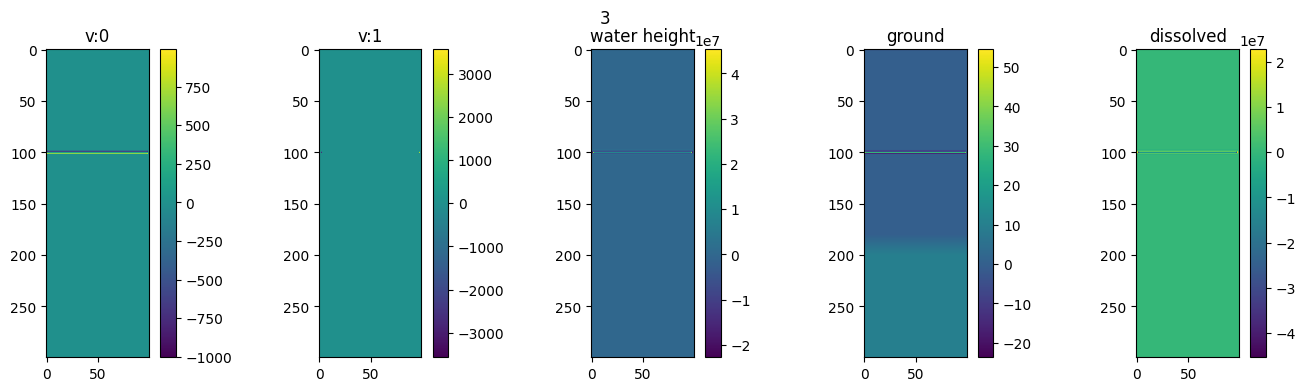

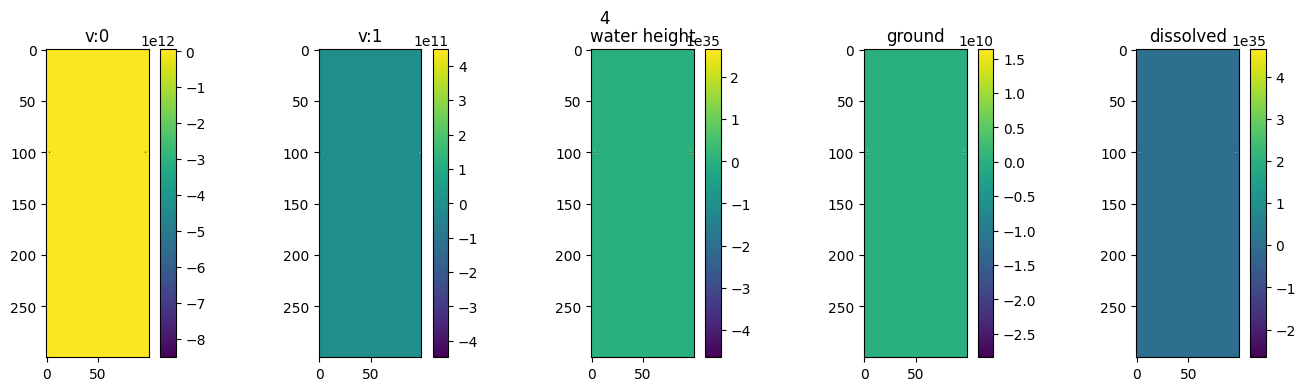

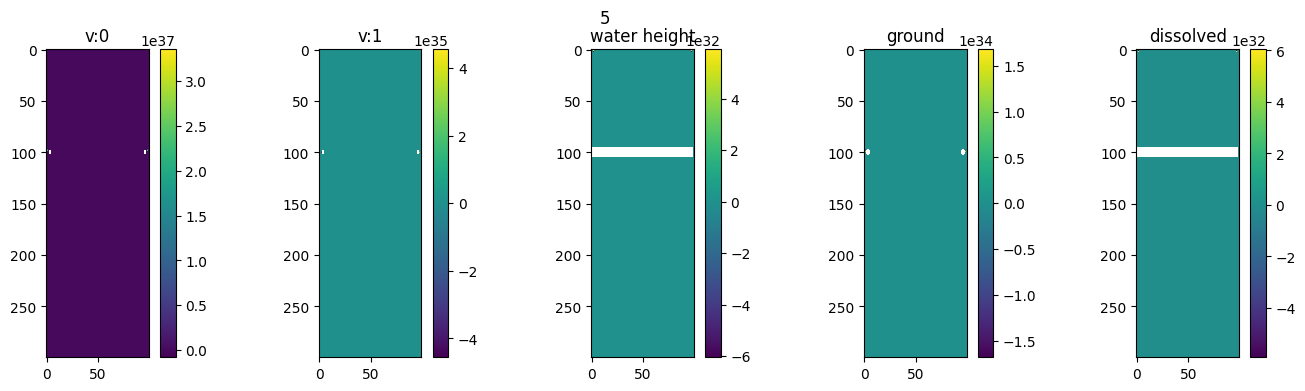

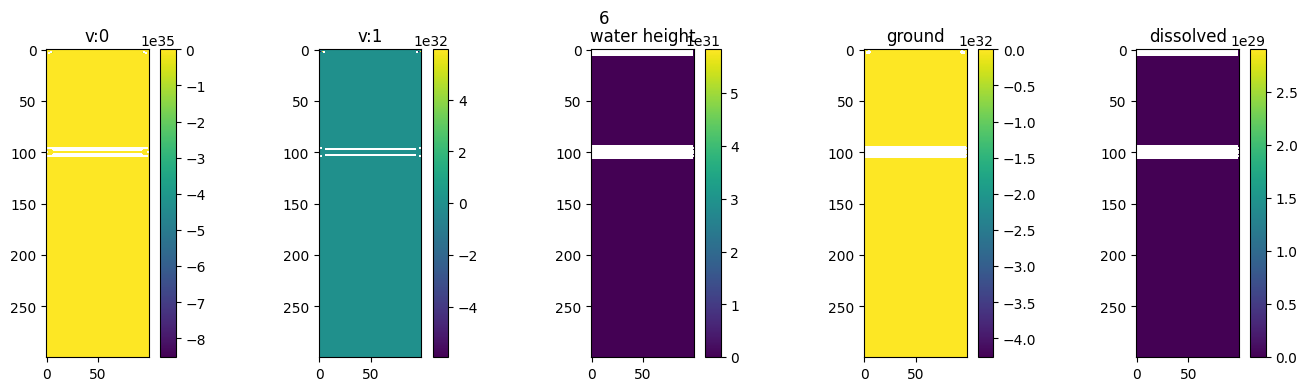

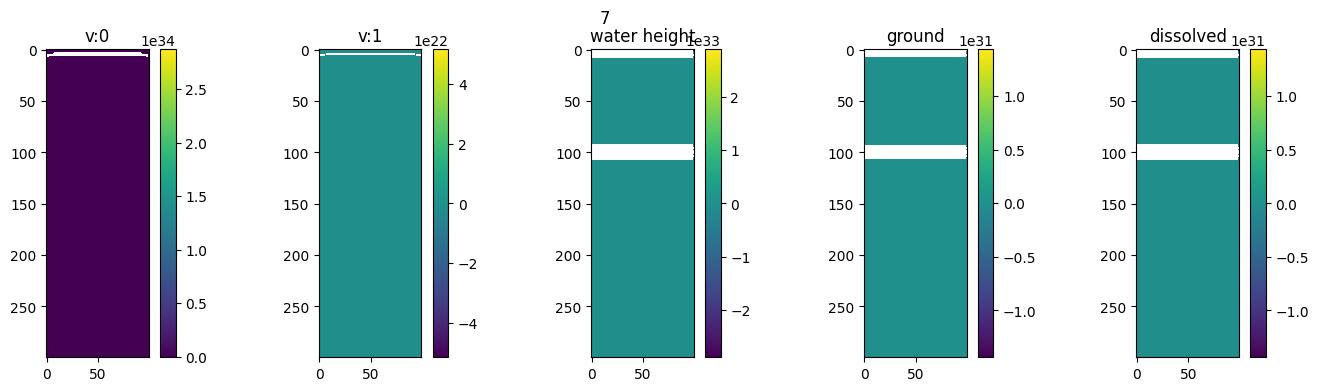

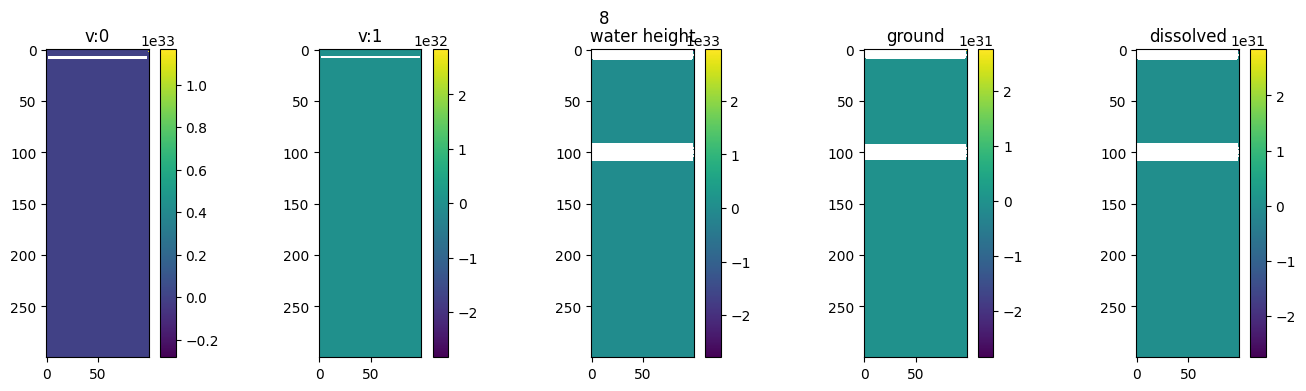

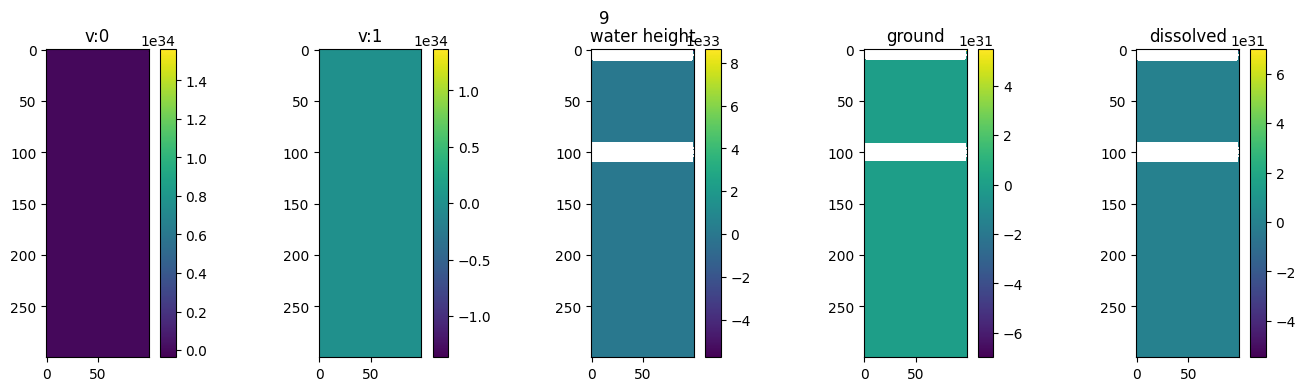

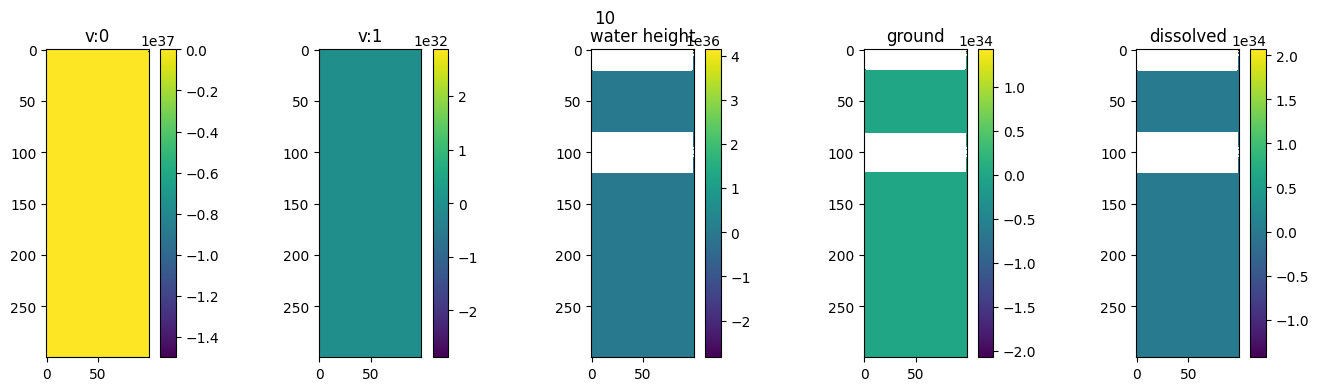

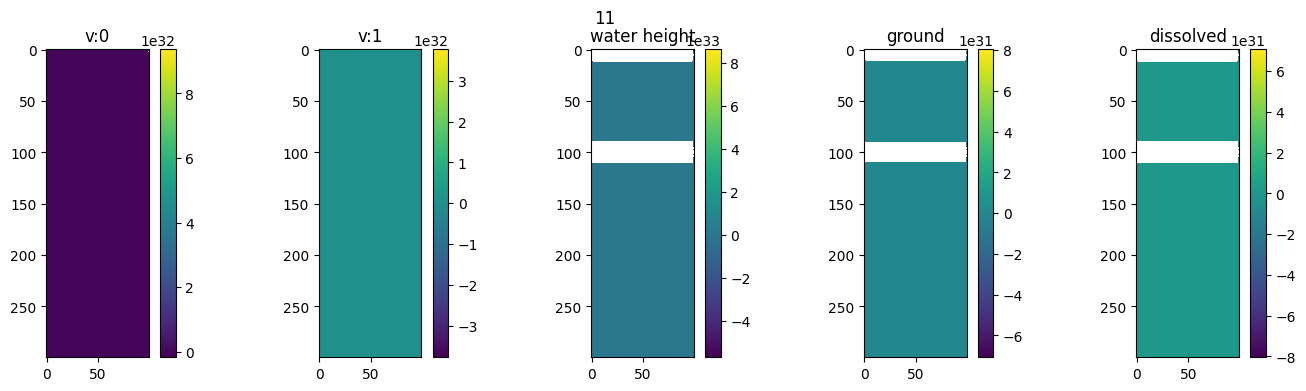

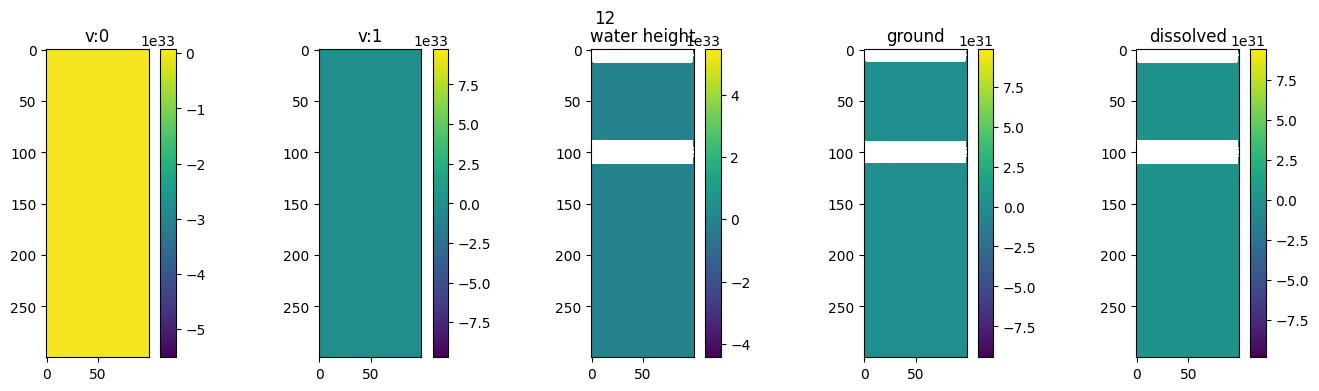

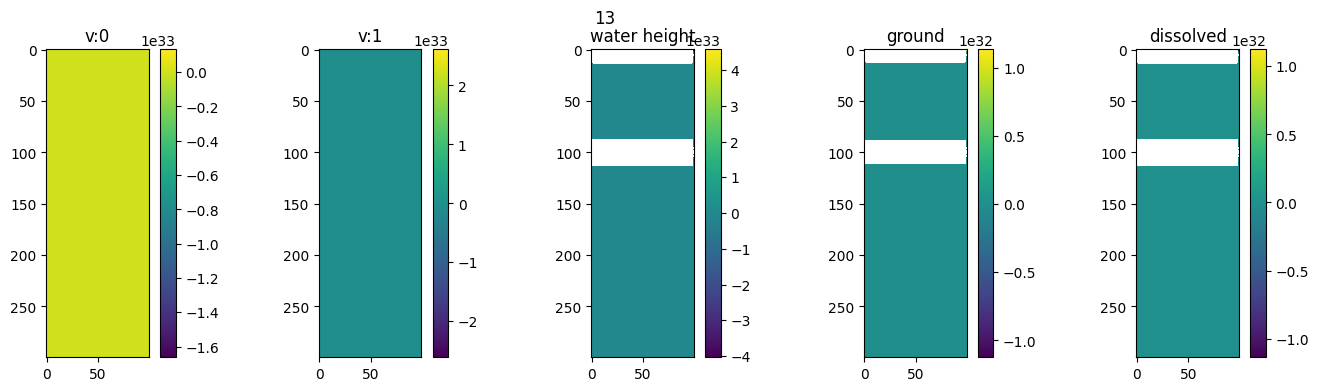

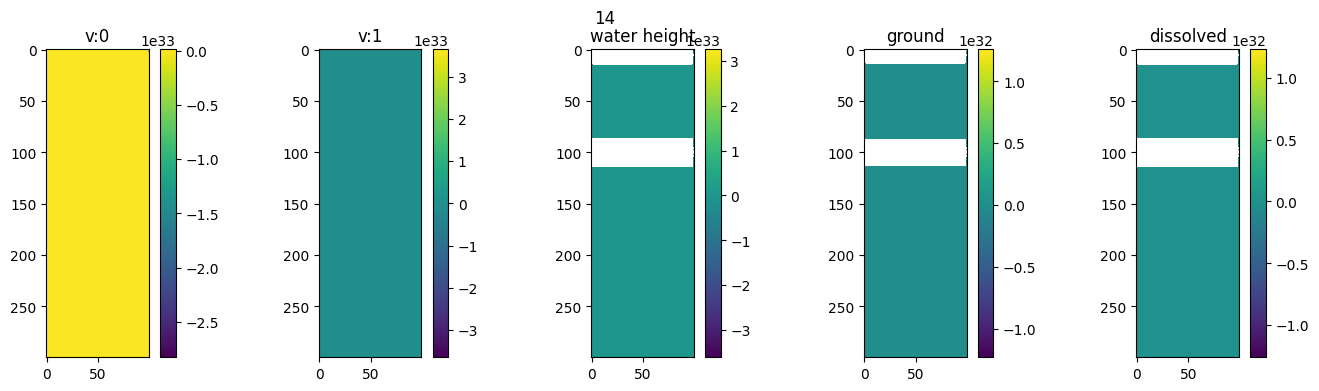

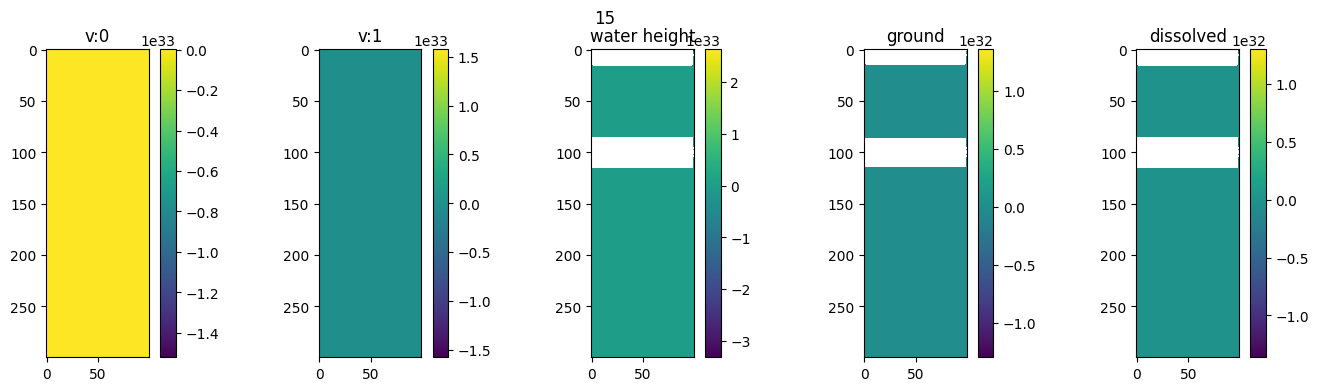

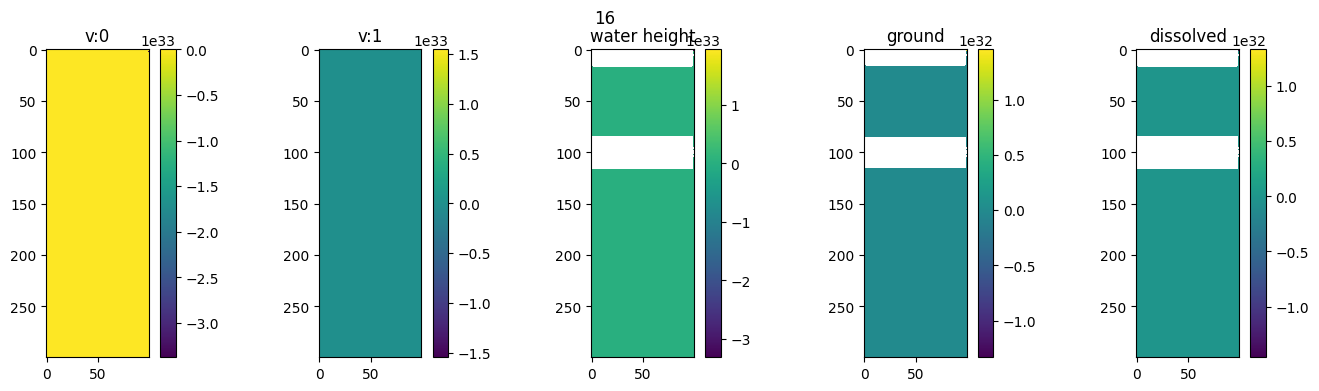

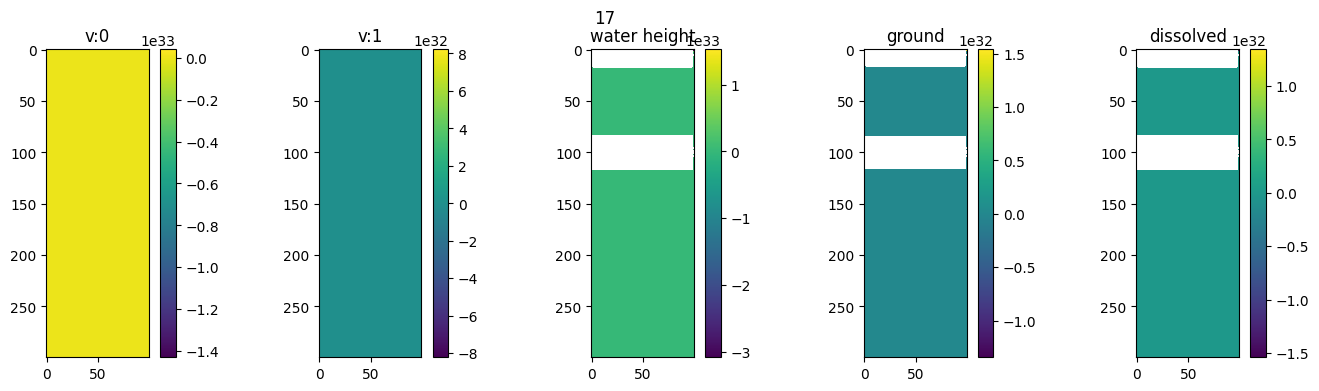

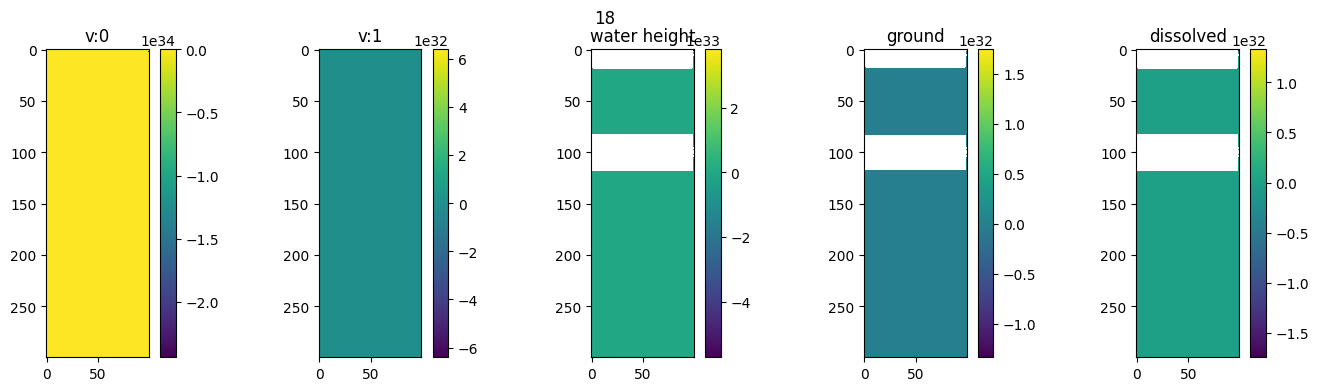

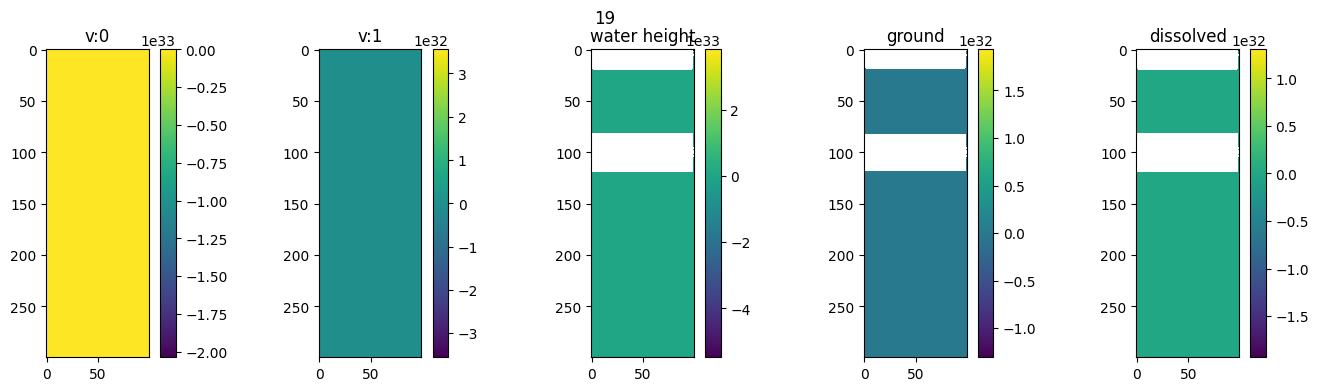

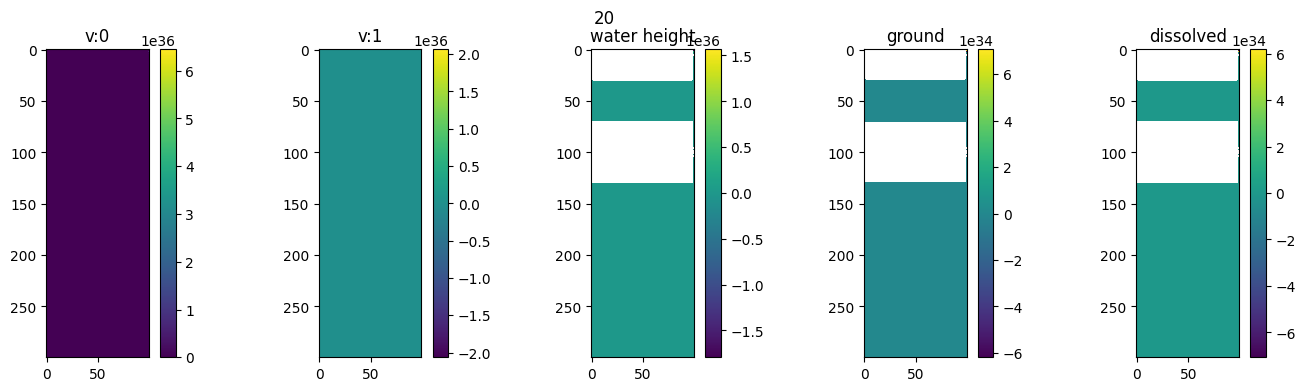

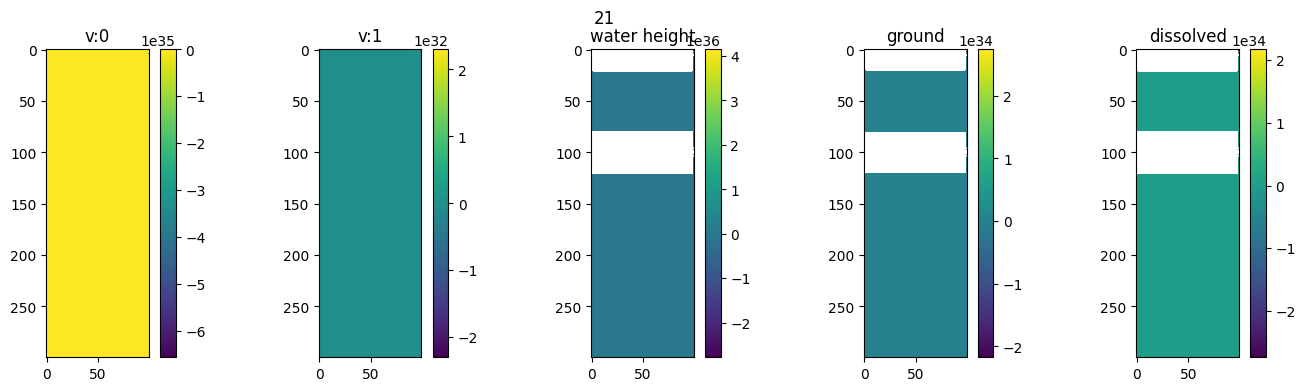

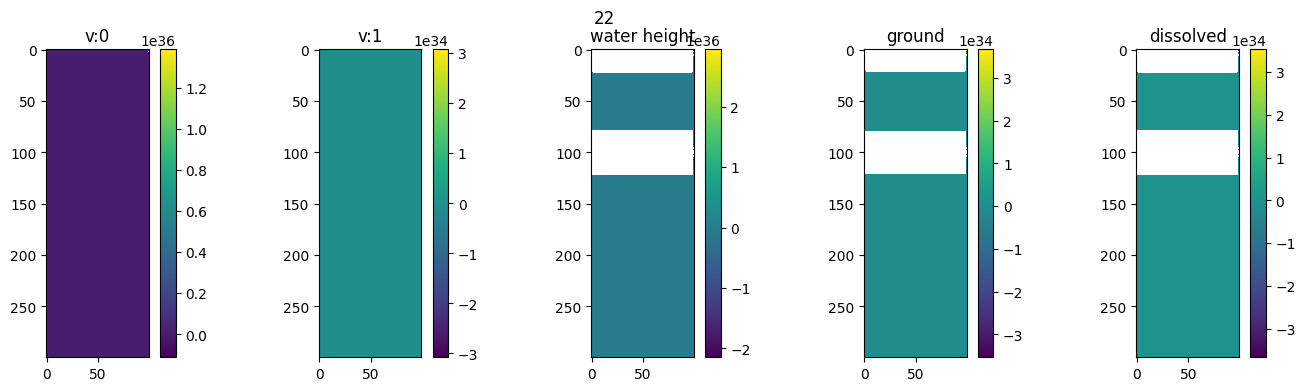

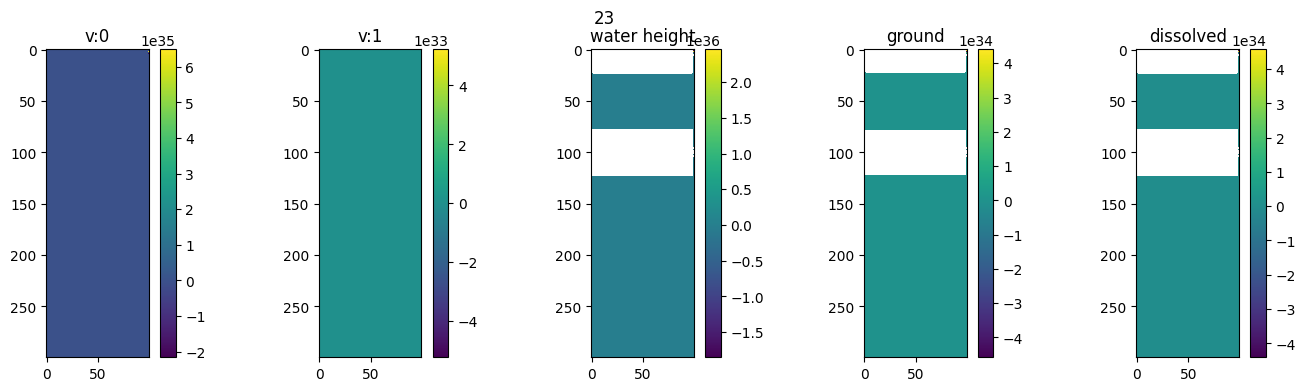

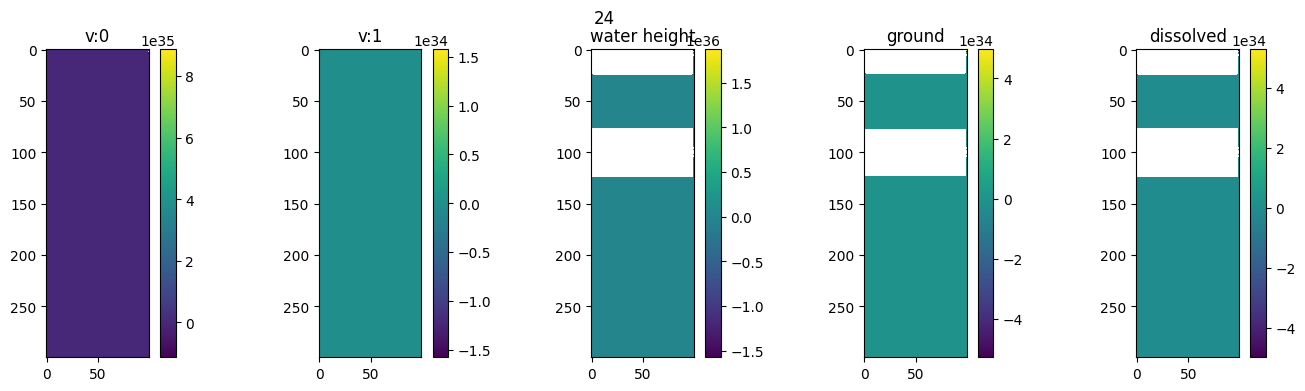

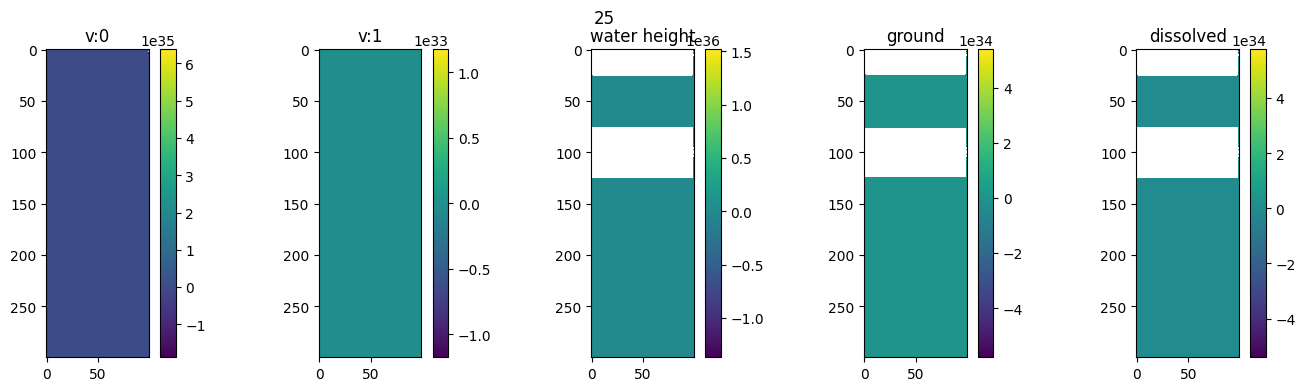

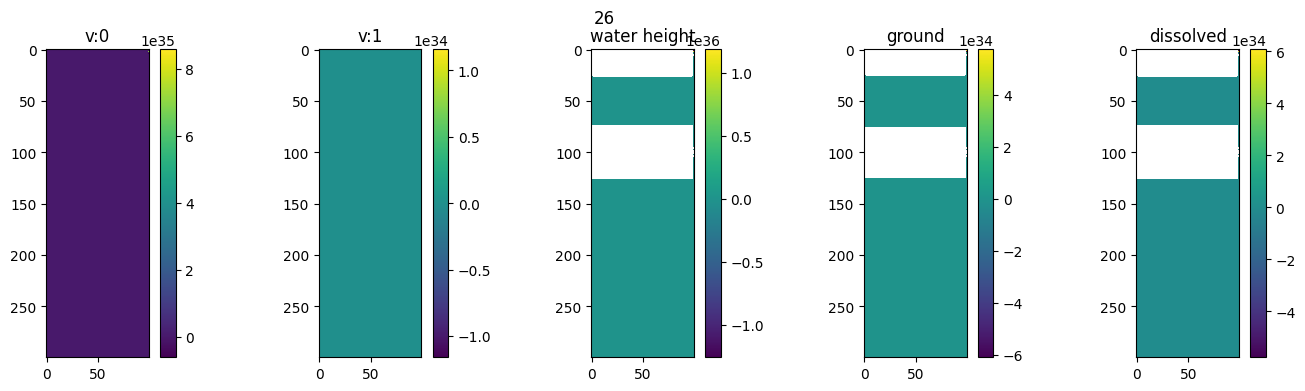

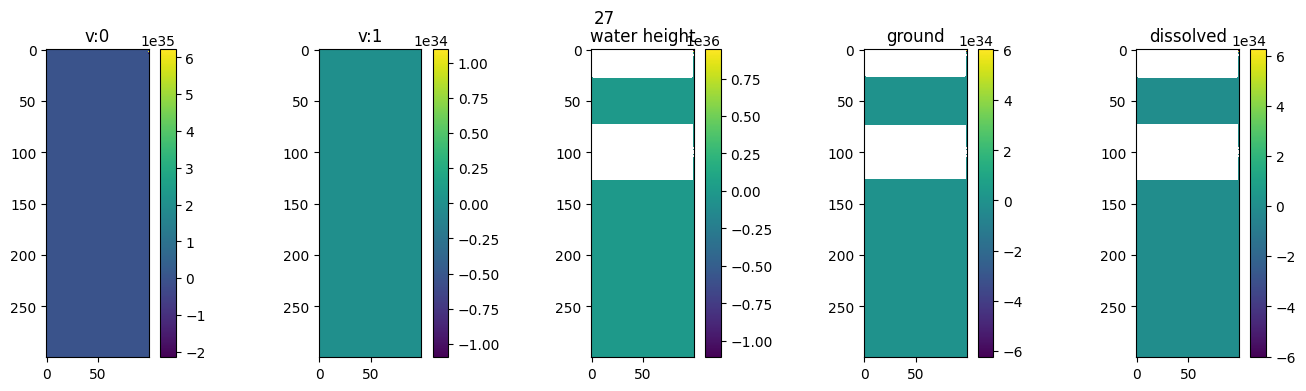

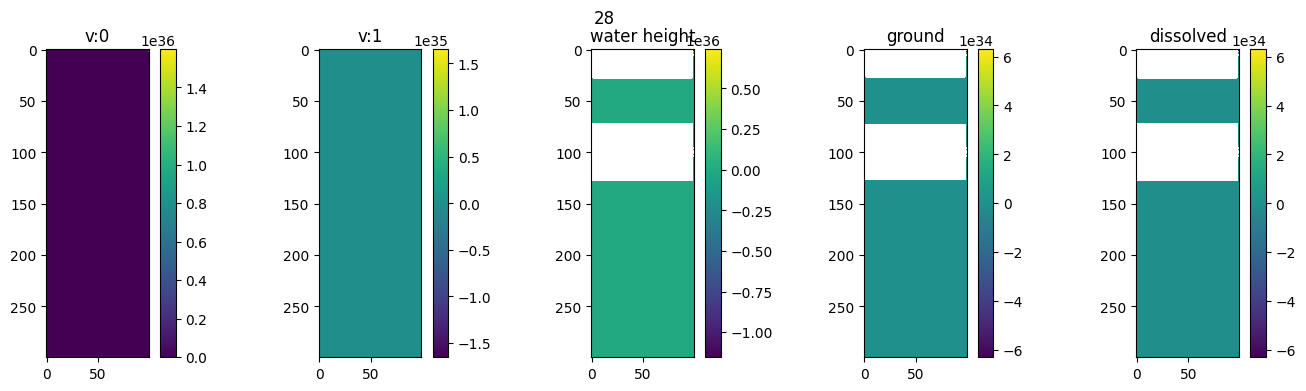

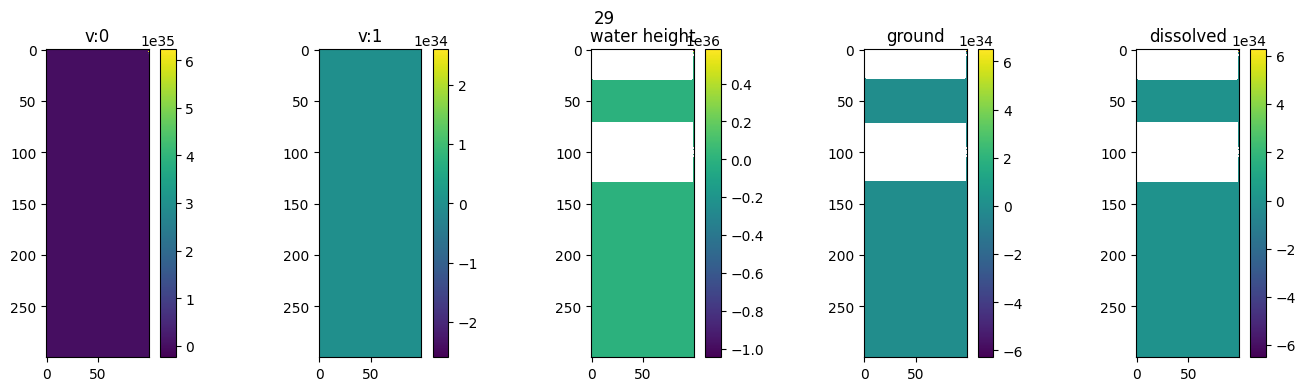

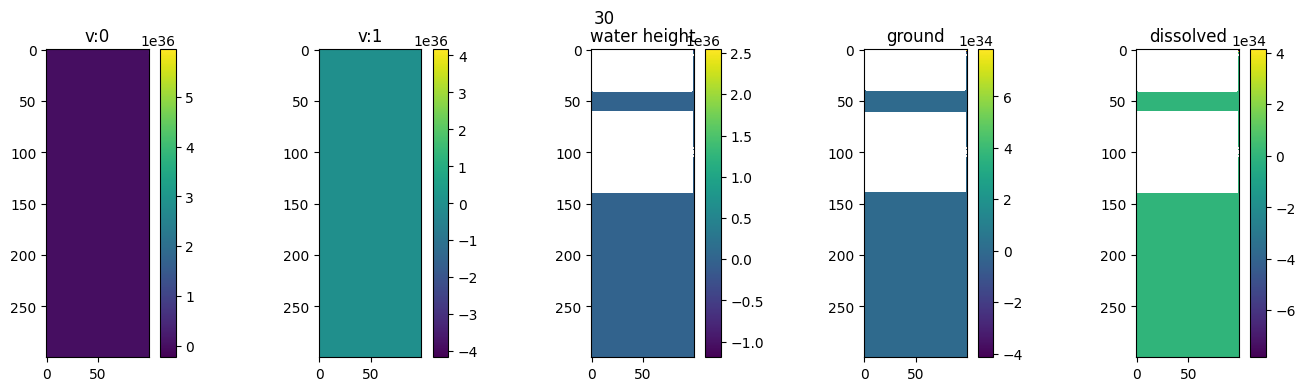

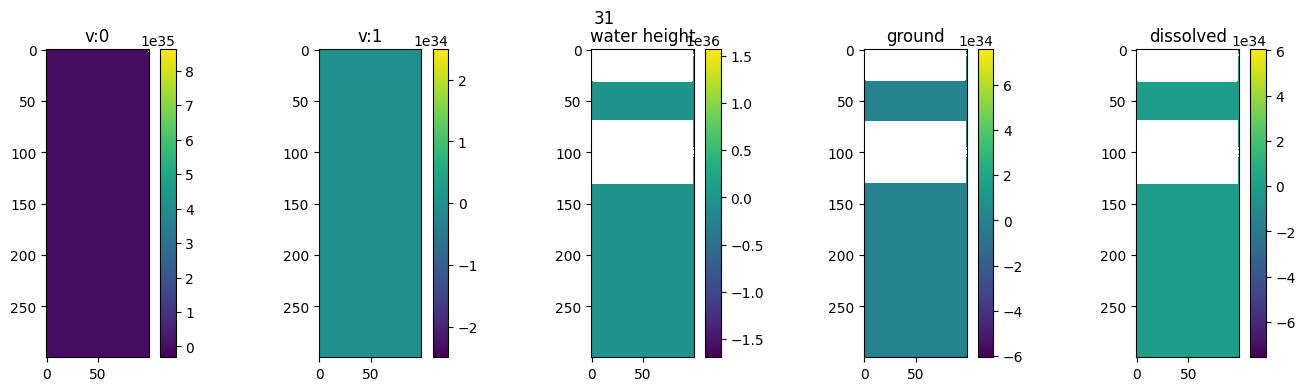

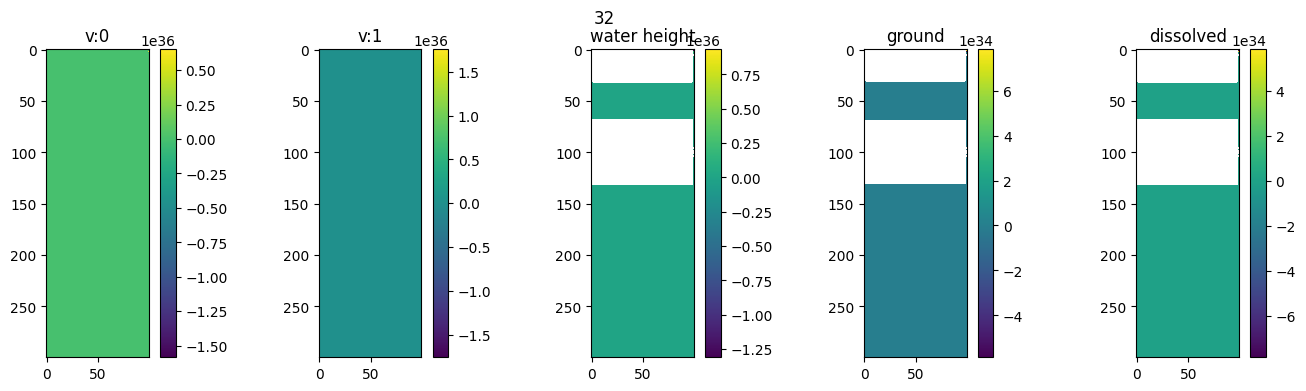

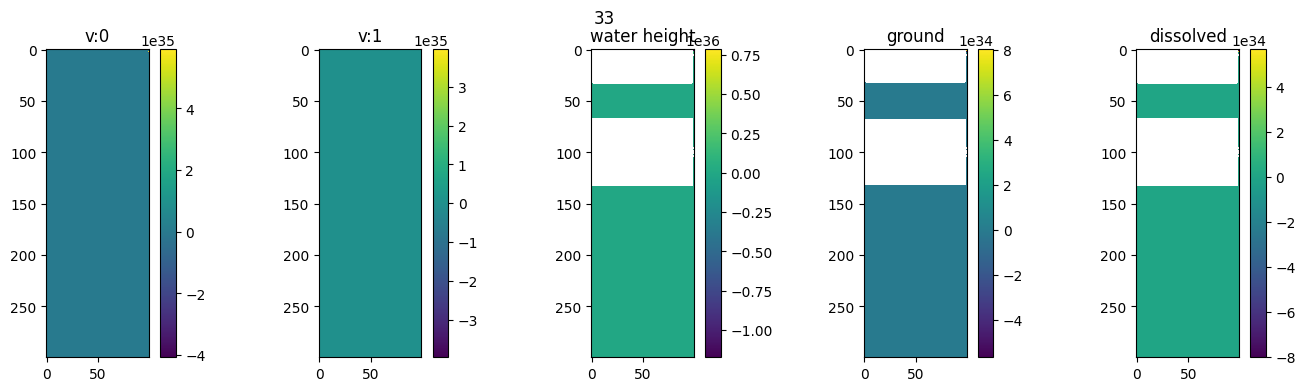

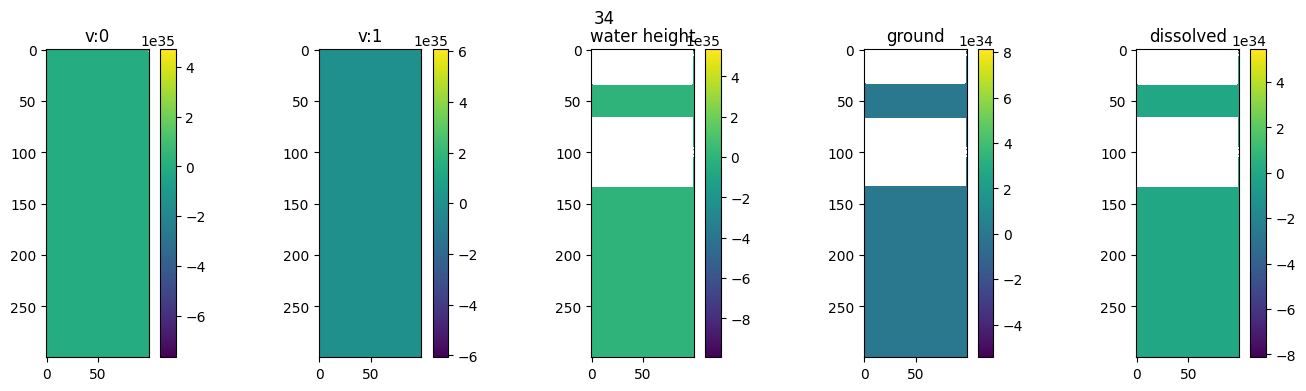

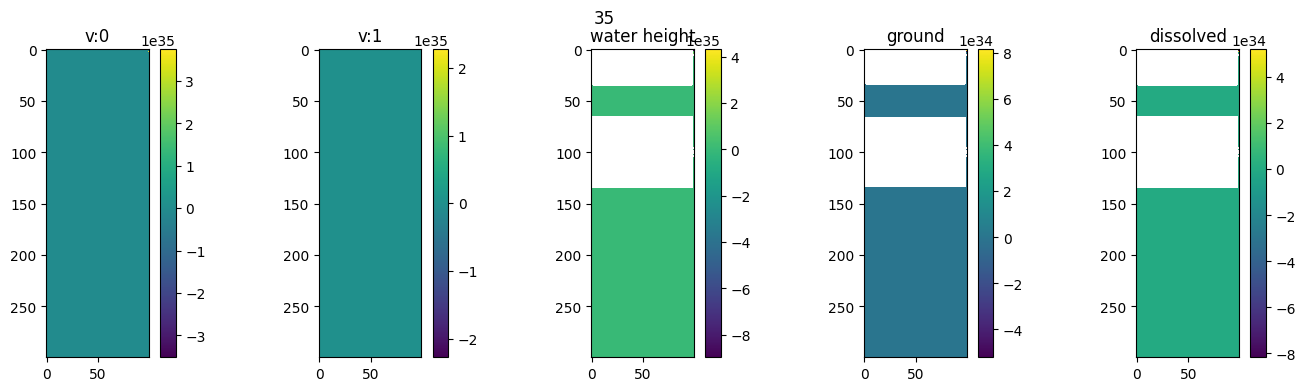

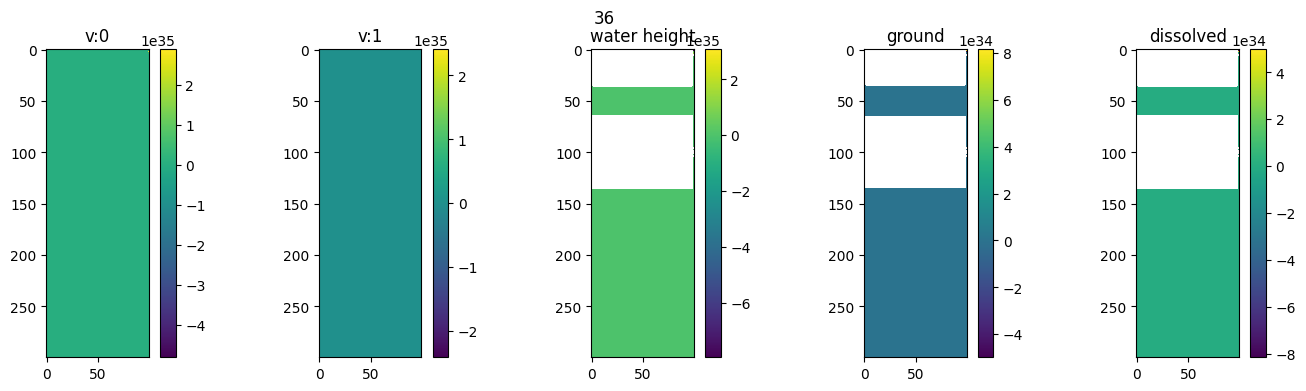

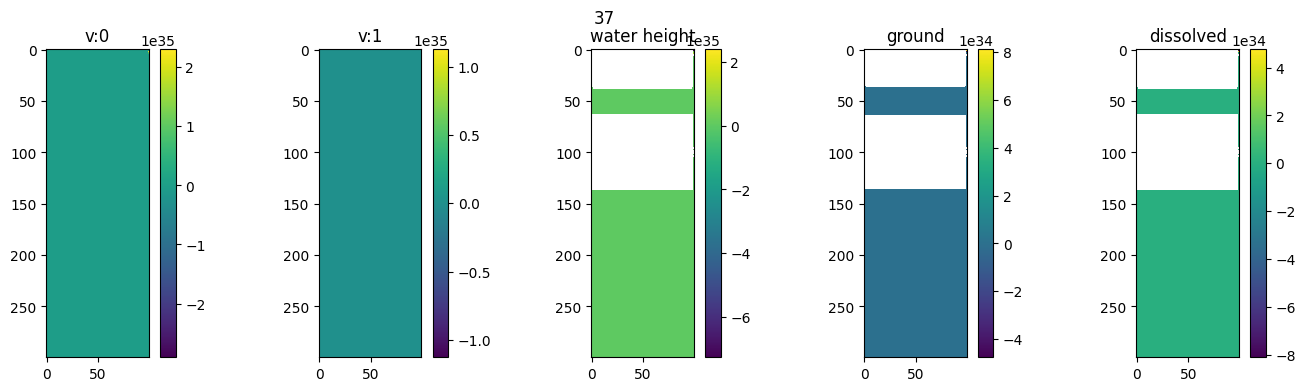

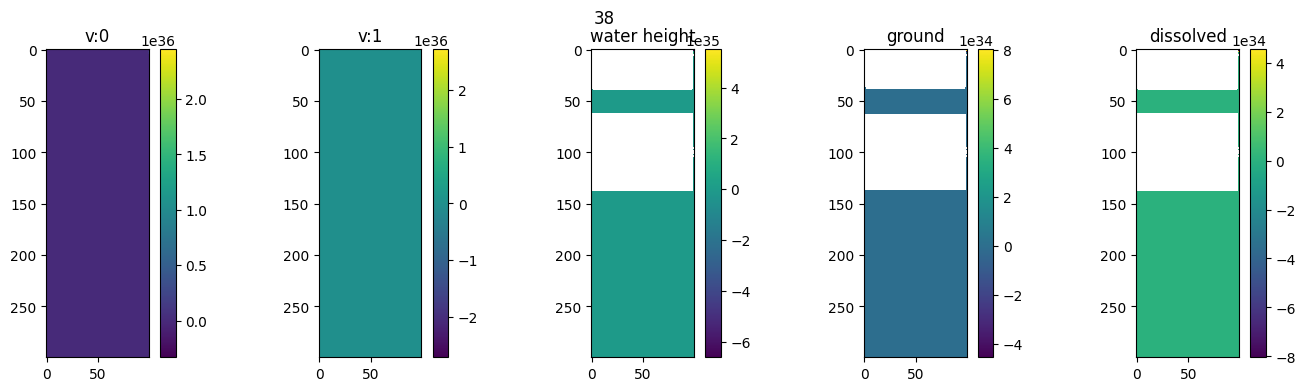

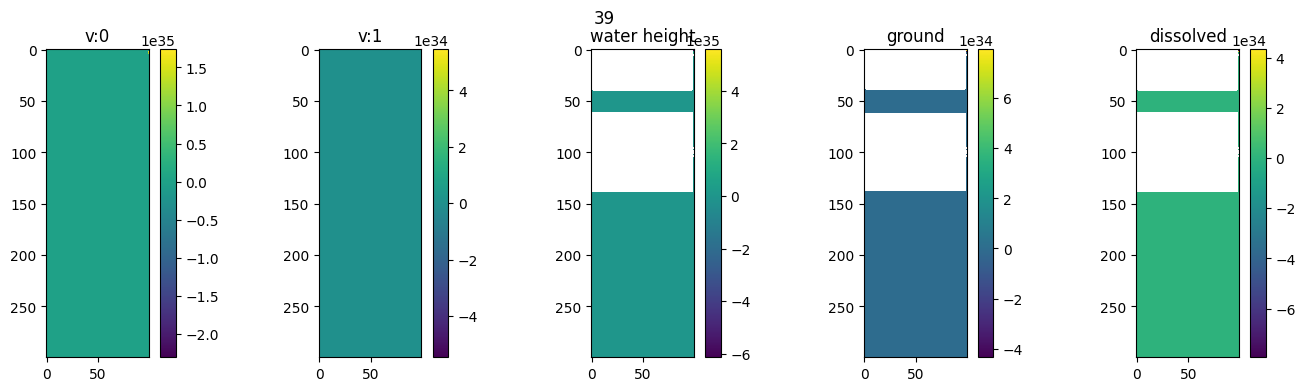

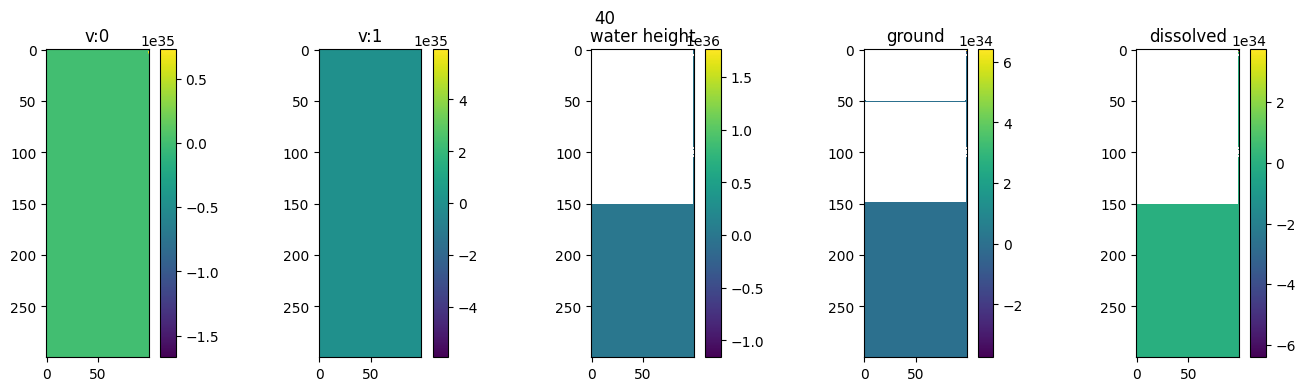

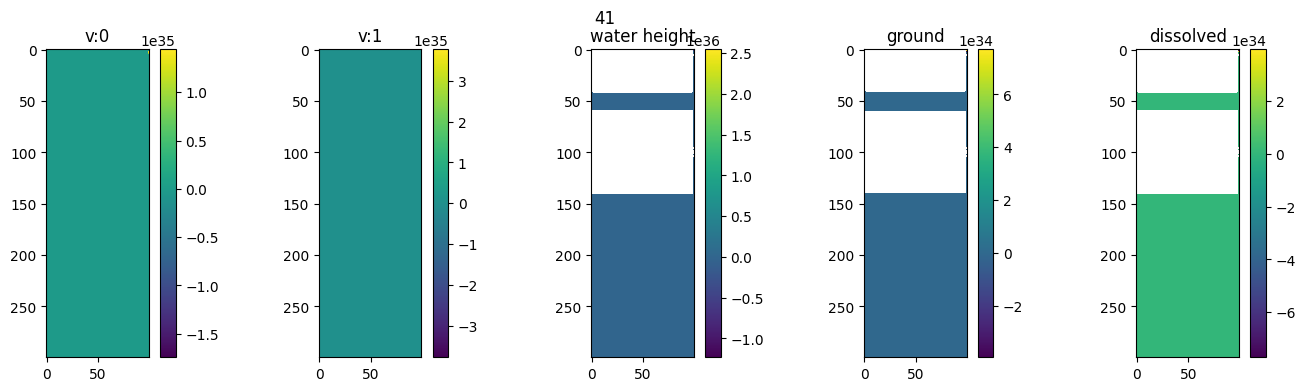

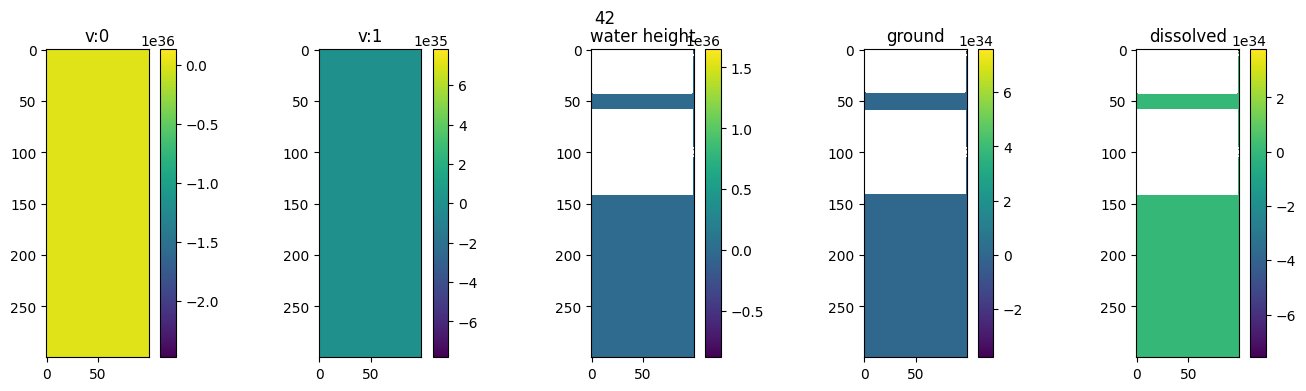

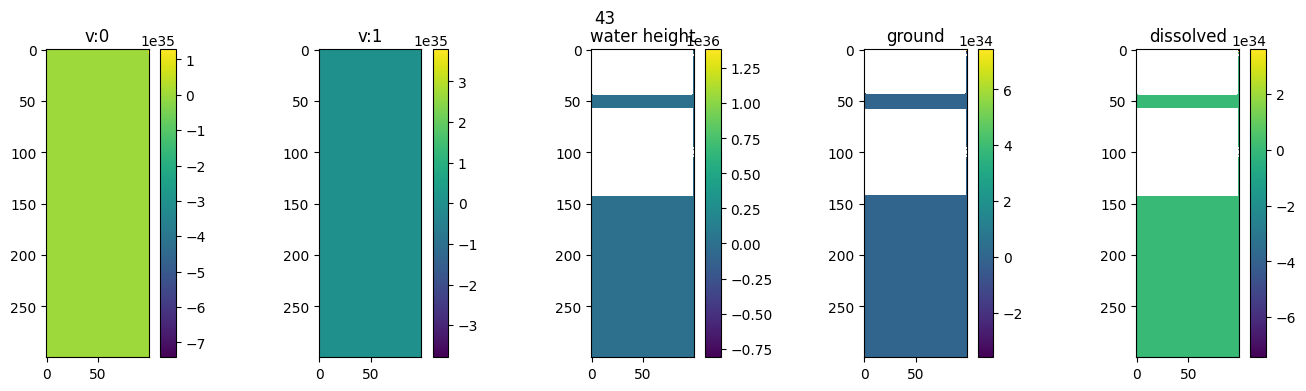

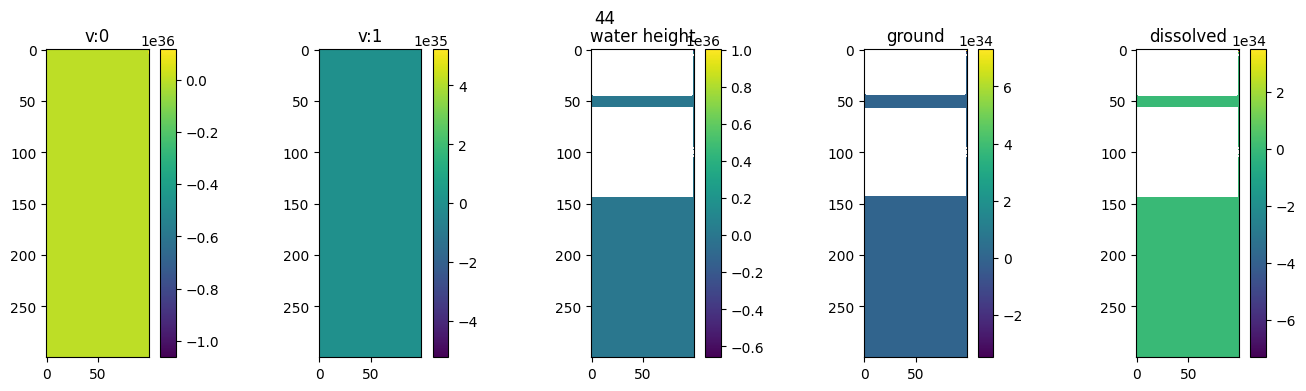

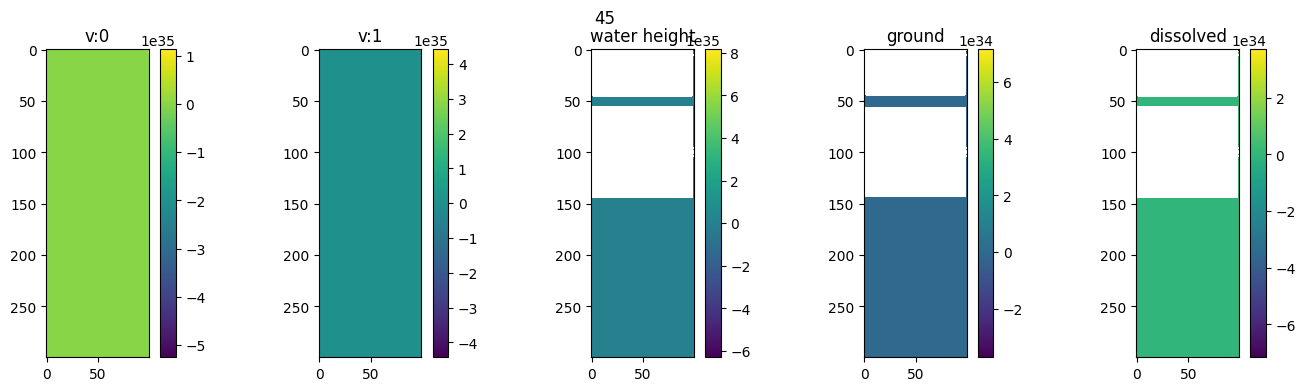

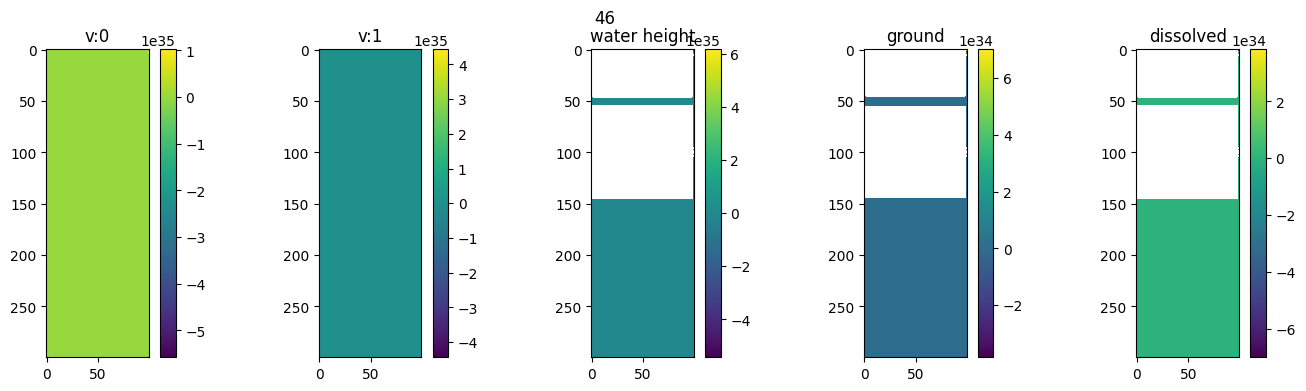

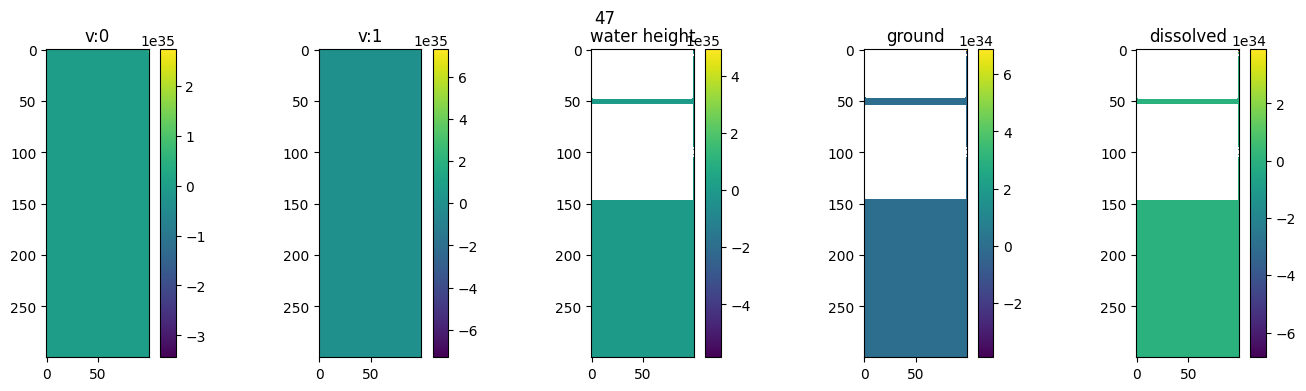

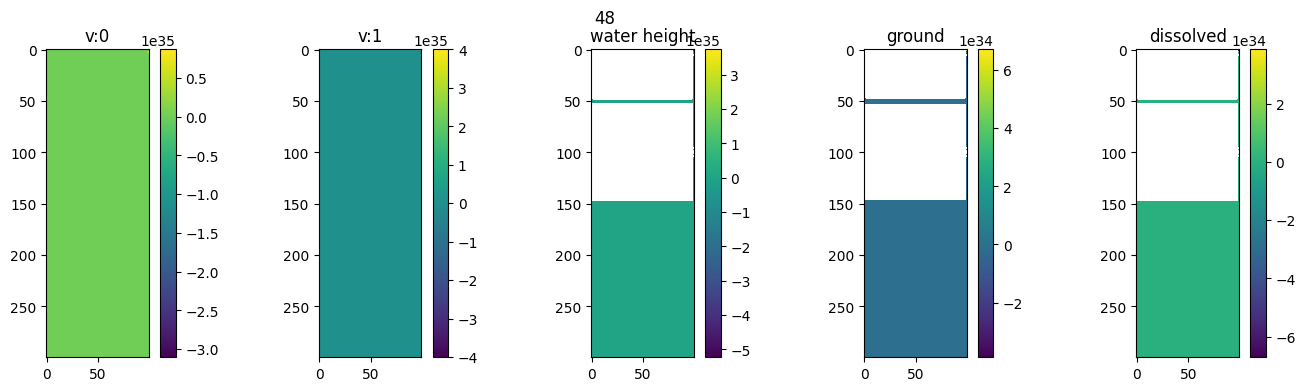

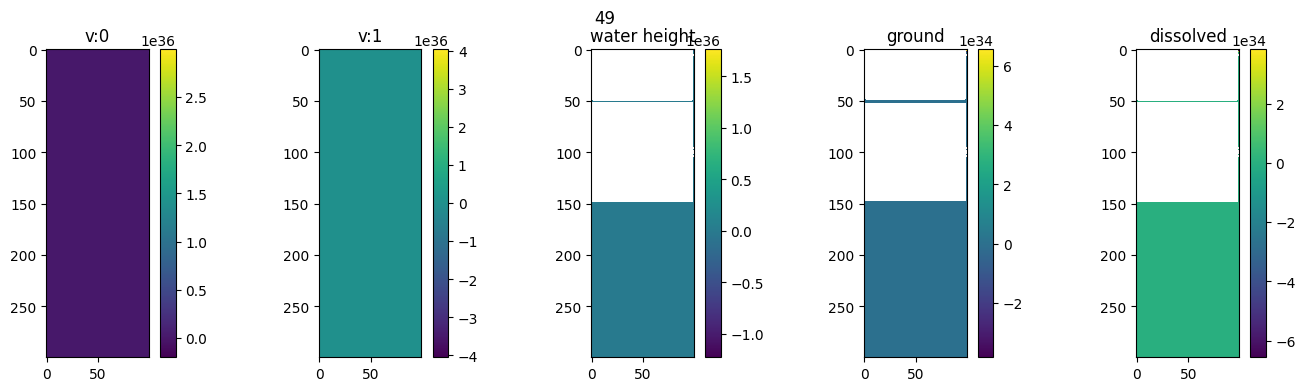

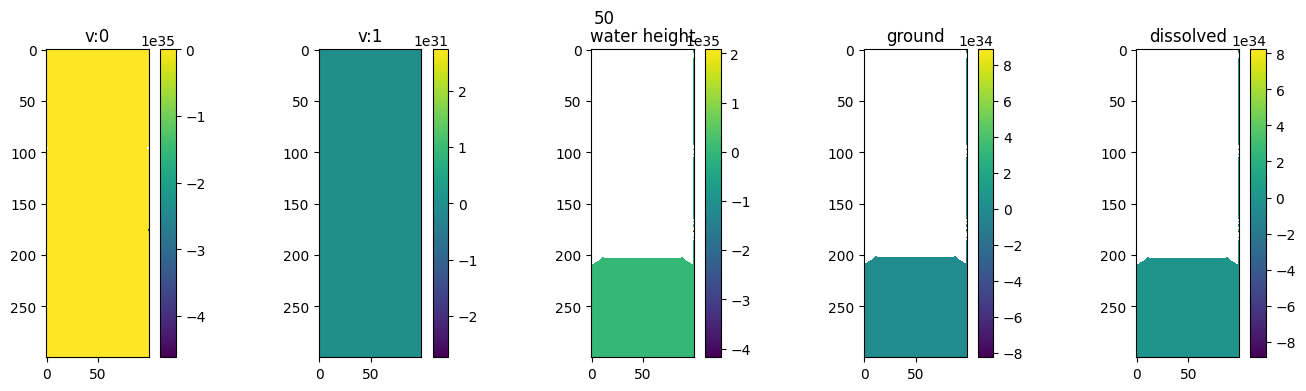

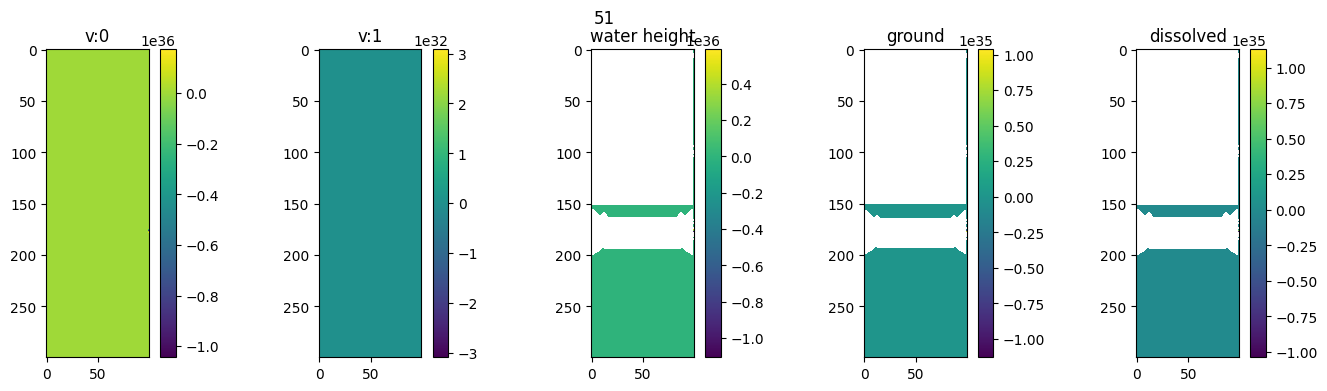

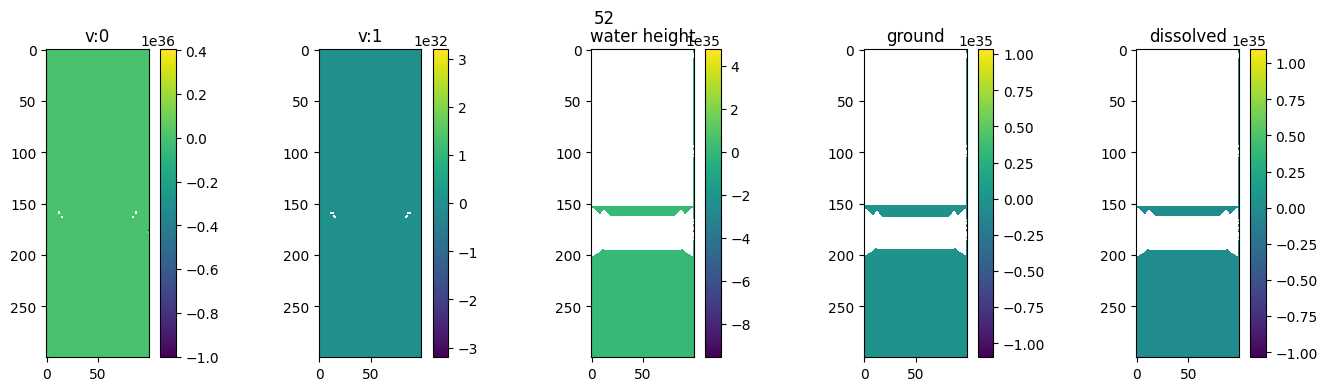

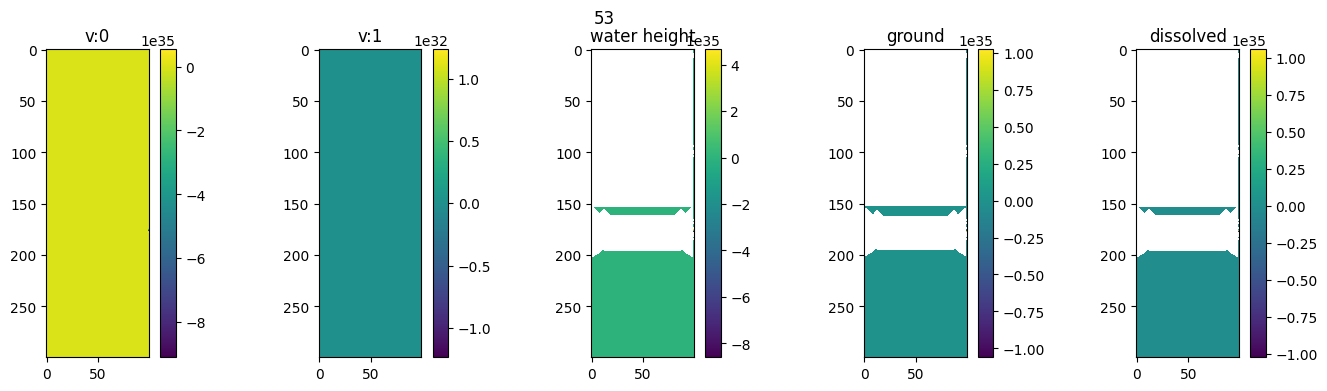

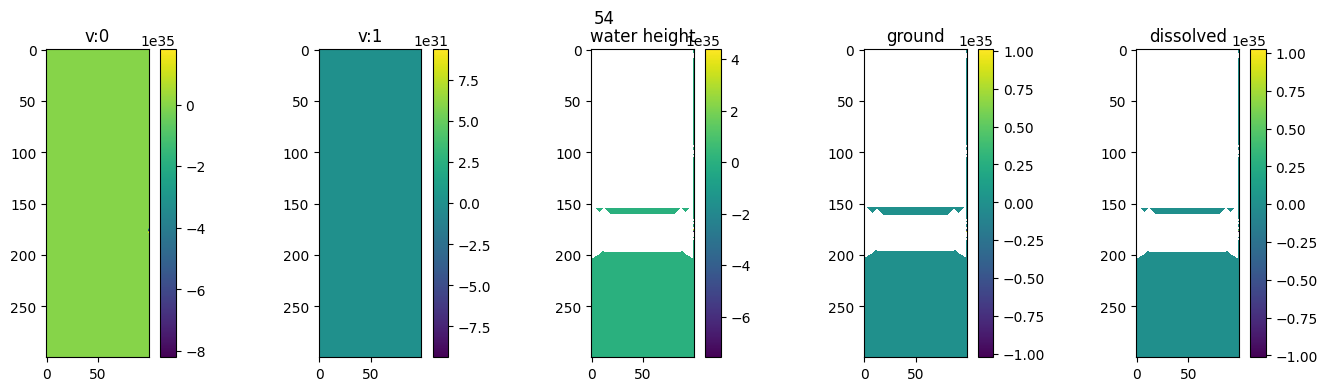

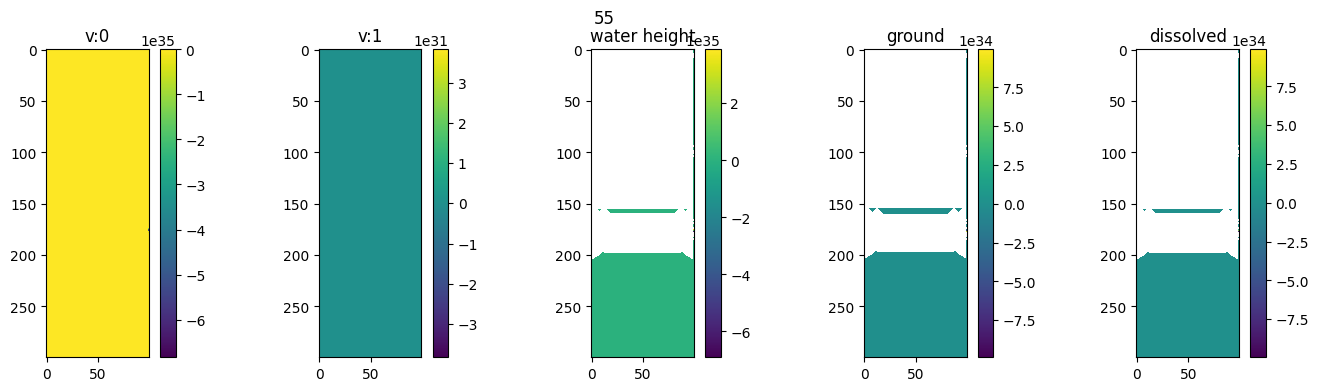

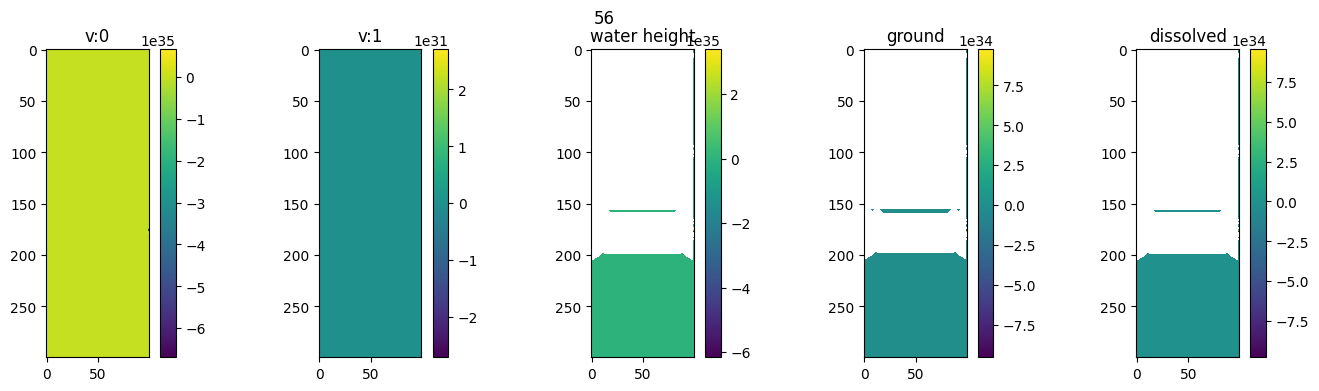

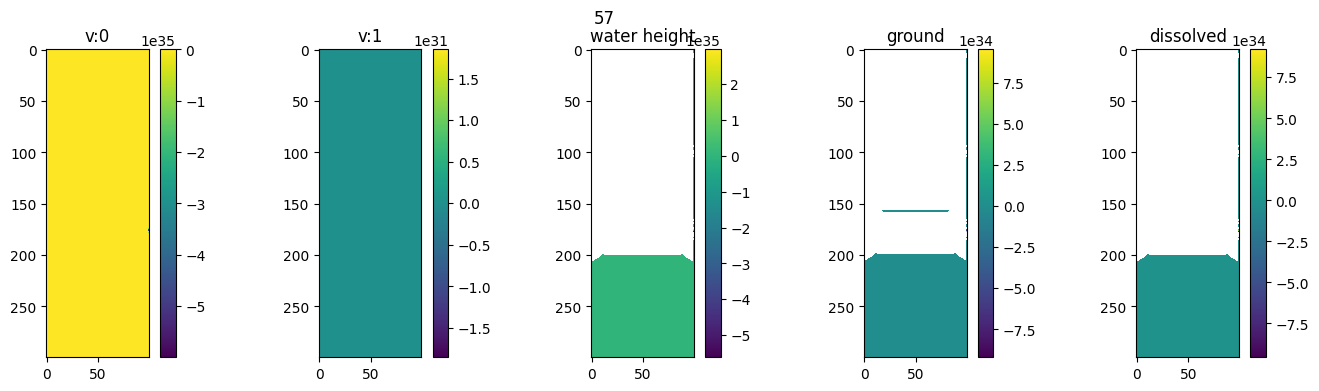

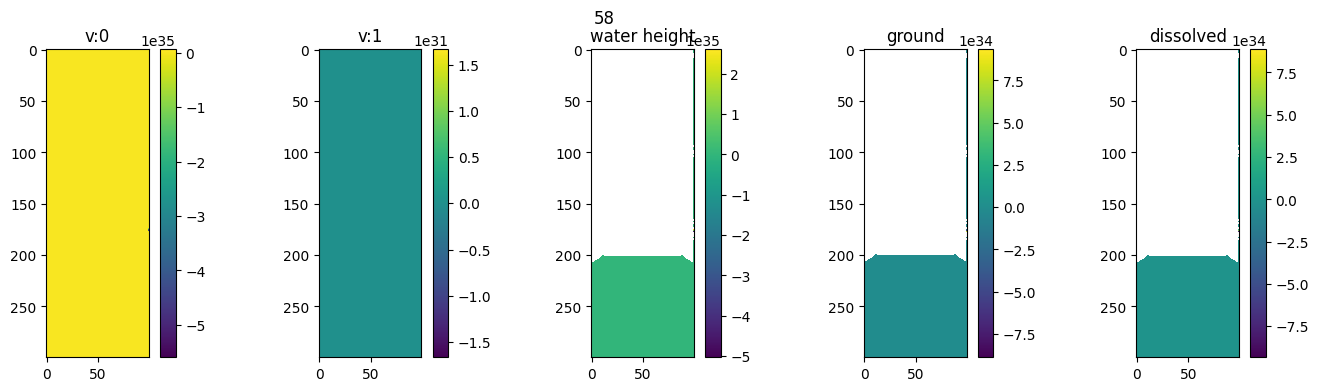

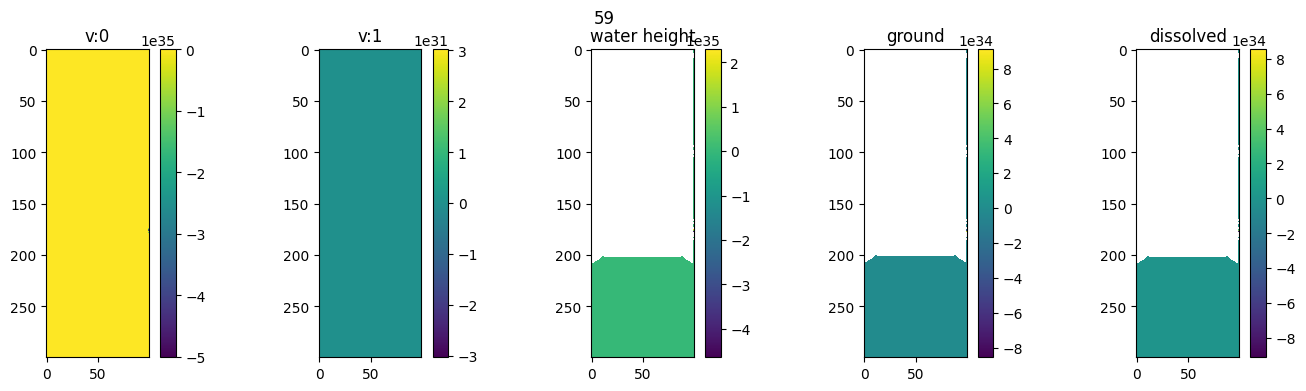

In [13]:
for k in stacked_data:
    print(k)
print(stacked_data["velocity"].shape)
for (i, layer) in enumerate(
        zip(stacked_data["velocity"], stacked_data["water"], stacked_data["ground"], stacked_data["dissolved"])):
    if i % 1 == 0:
        (velocity, water, ground, dissolved) = layer
        fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(17, 4), ncols=5)

        c_bar = ax1.imshow(velocity[:, :, 0])
        ax1.set_title("v:0")
        fig.colorbar(c_bar, ax=ax1)

        c_bar2 = ax2.imshow(velocity[:, :, 1])
        ax2.set_title("v:1")
        fig.colorbar(c_bar2, ax=ax2)

        c_bar3 = ax3.imshow(water)
        ax3.set_title("water height")
        fig.colorbar(c_bar3, ax=ax3)

        c_bar4 = ax4.imshow(ground)
        ax4.set_title("ground")
        fig.colorbar(c_bar4, ax=ax4)


        c_bar5 = ax5.imshow(dissolved)
        ax5.set_title("dissolved")
        fig.colorbar(c_bar5, ax=ax5)

        fig.suptitle(i)
        plt.show()

(400, 200, 1)
AxesImage(size=(400, 200))


/tmp/ipykernel_142902/722060829.py:50: RuntimeWarning: overflow encountered in power
  mags = np.sqrt(np.power(u, 2.0)+np.power(v, 2.0))


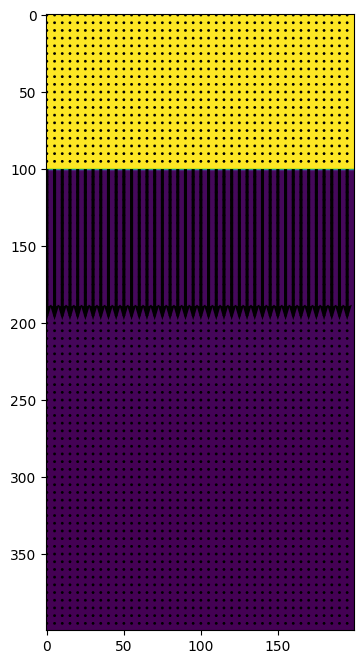

In [10]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(6, 8))
ax = plt.axes()
print(stacked_data["water"][0, :, :, :].shape)
img = plt.imshow(stacked_data["water"][0, :, :, :])
print(img)


def make_uv(array, skip_interval):
    u = []
    v = []

    for x in range(0, array.shape[0]):
        for y in range(0, array.shape[1]):
            if x % skip_interval == 0 and y % skip_interval == 0:
                u.append(array[x, y, 0])
                v.append(array[x, y, 1])
    #print("u len: {}".format(len(u)))
    """
    for x in range(0,array.shape[0]//skip_interval):
        for y in range(0,array.shape[1]//skip_interval):
            u.append(array[x*skip_interval,y*skip_interval,0])
            v.append(array[x*skip_interval,y*skip_interval,1])
    """
    #print("u len: {}".format(len(u)))
    u = np.array(u)
    v = np.array(v)
    return u, v


def make_quiver(skip_interval=5):
    x_arr = []
    y_arr = []
    u = []
    v = []
    #slope_path = Path("debug_data/velocity_10.npz")
    #data = np.load(slope_path)["0"][0]
    data = stacked_data["velocity"][30]

    for x in range(0, data.shape[0]):
        for y in range(0, data.shape[1]):
            if x % skip_interval == 0 and y % skip_interval == 0:
                x_arr.append(float(x))
                y_arr.append(float(y))
                u.append(100.0)
                v.append(100.0)
    #u, v = make_uv(data,skip_interval)
    DATA_LEN = len(x_arr)
    return ax.quiver(y_arr, x_arr, u, v, scale=100.0, width=0.01)


def animate_velocity(time, skip_interval=5):
    data = stacked_data["velocity"][time, :, :, :]
    u, v = make_uv(data, skip_interval)
    mags = np.sqrt(np.power(u, 2.0) + np.power(v, 2.0))

    quiver.set_UVC(v, u)
    return quiver


quiver = make_quiver()


def animate(frame_num):
    img.set_data(stacked_data["water"][frame_num, :, :, :])
    animate_velocity(frame_num)

    return img


anim = FuncAnimation(fig, animate, frames=stacked_data["water"].shape[0], interval=80)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.close()


(400, 200, 1)
AxesImage(size=(400, 200))


(400, 200, 1)
AxesImage(size=(400, 200))


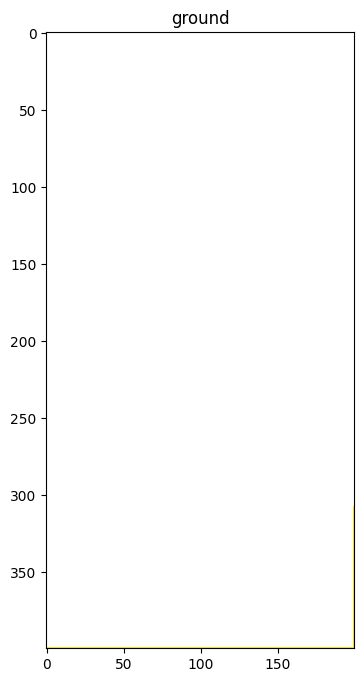

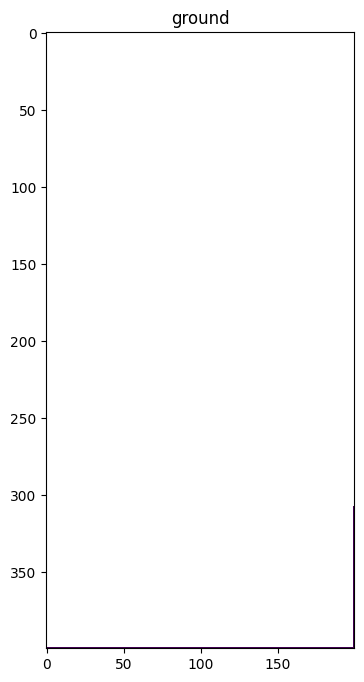

In [11]:
def make_animated_plot(data, velocity=None, title=None, total_time=10.0, frame_start_offset=0):
    def make_uv(array, skip_interval):
        u = []
        v = []

        for x in range(0, array.shape[0]):
            for y in range(0, array.shape[1]):
                if x % skip_interval == 0 and y % skip_interval == 0:
                    u.append(array[x, y, 0])
                    v.append(array[x, y, 1])
        #print("u len: {}".format(len(u)))
        """
    for x in range(0,array.shape[0]//skip_interval):
        for y in range(0,array.shape[1]//skip_interval):
            u.append(array[x*skip_interval,y*skip_interval,0])
            v.append(array[x*skip_interval,y*skip_interval,1])
    """

        u = np.array(u)
        v = np.array(v)
        return u, v

    def make_quiver(skip_interval=5):
        x_arr = []
        y_arr = []
        u = []
        v = []
        #slope_path = Path("debug_data/velocity_10.npz")
        #data = np.load(slope_path)["0"][0]
        plot_data = velocity[30]

        for x in range(0, plot_data.shape[0]):
            for y in range(0, plot_data.shape[1]):
                if x % skip_interval == 0 and y % skip_interval == 0:
                    x_arr.append(float(x))
                    y_arr.append(float(y))
                    u.append(100.0)
                    v.append(100.0)
        #u, v = make_uv(data,skip_interval)
        DATA_LEN = len(x_arr)
        return ax.quiver(y_arr, x_arr, u, v, scale=100.0, width=0.01)

    def animate_velocity(time, skip_interval=5):
        vel_data = velocity[time, :, :, :]
        u, v = make_uv(vel_data, skip_interval)
        mags = np.sqrt(np.power(u, 2.0) + np.power(v, 2.0))

        quiver.set_UVC(v, u)
        return quiver

    def make_title_str(title, frame_num):
        plot_title = ""
        if plot_title is not None:
            plot_title = title.format(frame_num)
        else:
            plot_title = str(frame_num)
        return plot_title

    def animate(frame_num):
        plot_title = make_title_str(title, frame_num + frame_start_offset)
        plt.title(plot_title)
        img.set_data(data[frame_num, :, :, :])
        if velocity is not None:
            animate_velocity(frame_num)

        return img

    if velocity is not None:
        quiver = make_quiver()
    fig = plt.figure(figsize=(6, 8))
    ax = plt.axes()
    print(data[0, :, :, :].shape)
    img = plt.imshow(data[0, :, :, :])
    print(img)
    plot_title = make_title_str(title, frame_start_offset)
    plt.title(plot_title)
    interval = total_time * 1000.0 / float(data.shape[0])
    anim = FuncAnimation(fig, animate, frames=data.shape[0], interval=interval)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)


make_animated_plot(stacked_data["ground"], title="ground")
make_animated_plot(stacked_data["dissolved"], title="ground")

(400, 200, 1)
AxesImage(size=(400, 200))


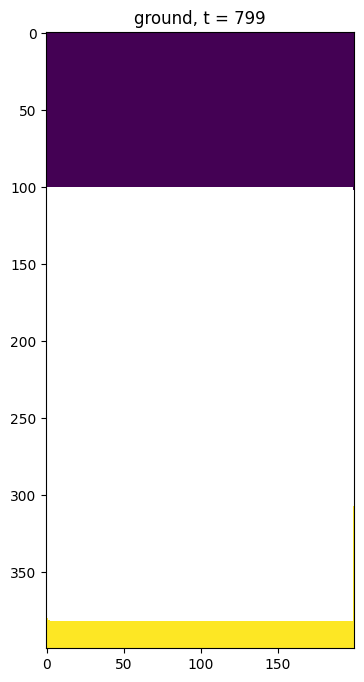

In [12]:
make_animated_plot(stacked_data["ground"][700:800, :, :, :], title="ground, t = {}", frame_start_offset=700)

(400, 200, 1)
AxesImage(size=(400, 200))


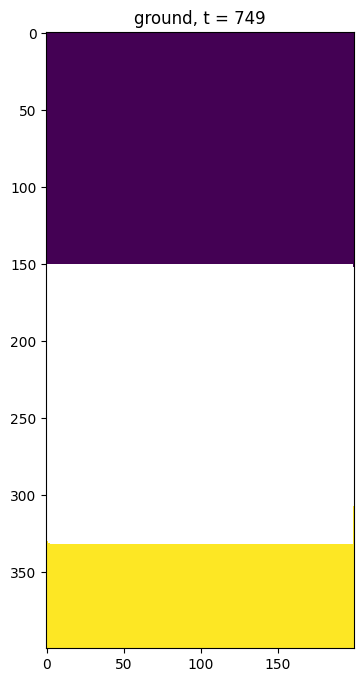

In [13]:
make_animated_plot(stacked_data["ground"][700:750, :, :, :], title="ground, t = {}", frame_start_offset=700)

(400, 200, 1)
AxesImage(size=(400, 200))


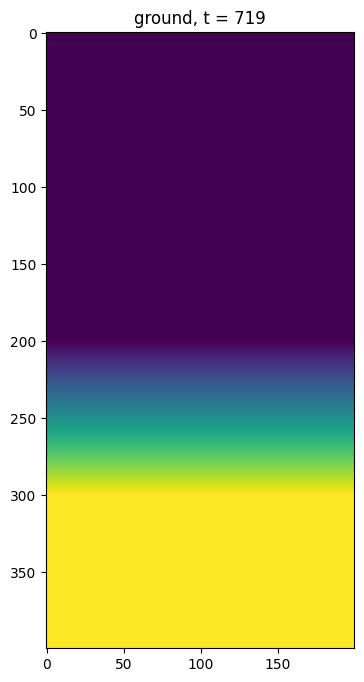

In [14]:
make_animated_plot(stacked_data["ground"][705:720, :, :, :], title="ground, t = {}", frame_start_offset=705)

/home/nick/programming/RustWaterSim/dev_venv/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


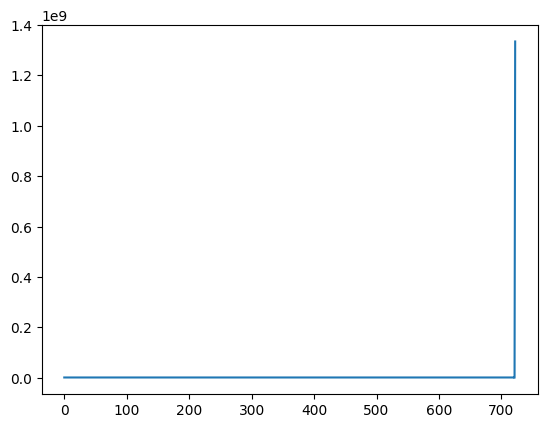

In [15]:

def get_sums(data):
    sums = np.zeros(data.shape[0])
    for i in range(0, data.shape[0]):
        s = np.sum(data[i, :, :])
        sums[i] = s
    return sums


plt.plot(get_sums(stacked_data["water"]))
plt.show()

In [16]:
plt.plot(np.diff(sums)[0:700])
plt.grid(True)
plt.show()

NameError: name 'sums' is not defined

In [ ]:
arr = np.array([1, 2, 3, 4])
print(np.diff(arr))

In [ ]:
nan_table = np.isnan(stacked_data["water"])
print(nan_table.shape)
print(nan_table[0, 0, 0, 0])

In [ ]:
for i, layer in enumerate(nan_table):
    contains_nan = not np.all(layer == False)
    if contains_nan:
        print("layer {} contains nan".format(i))

In [ ]:
plt.imshow(stacked_data["water"][270, :, :, :])
plt.show()

In [ ]:
plt.imshow(stacked_data["water"][269, :, :, :])
plt.show()

In [ ]:
velocity = np.copy(stacked_data["velocity"])
velocity[np.isnan(velocity)] = 0.0
velocity[np.isinf(velocity)] = 0.0
velocity[velocity > 100.0] = 100.0
velocity[velocity < -100.0] = -100.0
print(np.max(velocity))
plt.show()

velocity_magnitude = np.sqrt(
    np.power(velocity[:, :, :, 0], 2.0) + np.power(velocity[:, :, :, 1], 2.0)
)
print(velocity_magnitude.shape)

In [ ]:
plt.imshow(velocity_magnitude[270, :, :])
plt.show()
print(np.max(velocity_magnitude[270, :, :]))

In [ ]:
plt.imshow(velocity_magnitude[269, :, :])
plt.show()

In [ ]:
print(np.where([[True, False], [True, True]],
               [[0, 0], [0, 0]], [[1, 1], [1, 1]]))

In [ ]:
print(np.max(stacked_data["dissolved"]))
d_sums = get_sums(stacked_data["dissolved"])
plt.plot(d_sums)
plt.show()
print(d_sums)